In [222]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score

In [223]:
# 데이터
training_set = pd.read_csv(r'C:\Users\simto\Documents\GIT\2024-08-05_Encore-4\day36\data\train.csv',encoding='CP949')

In [224]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [225]:
training_set


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [226]:
def check_missing(df):
    """주어진 데이터프레임의 결측치 확인 함수
    
    Args:
        df (pd.DataFrame): 검사할 데이터프레임.
    """
    for col in df.columns:  # 모든 열 반복
        missing_count = df[col].isnull().sum()  # 결측치 개수 계산
        if missing_count > 0:  # 결측치가 있는 경우
            print(f'{col} column missing values: {missing_count}, datatype: {df[col].dtype}')  # 출력

# 함수 실행
check_missing(training_set)


MonthlyRevenue column missing values: 156, datatype: float64
MonthlyMinutes column missing values: 156, datatype: float64
TotalRecurringCharge column missing values: 156, datatype: float64
DirectorAssistedCalls column missing values: 156, datatype: float64
OverageMinutes column missing values: 156, datatype: float64
RoamingCalls column missing values: 156, datatype: float64
PercChangeMinutes column missing values: 367, datatype: float64
PercChangeRevenues column missing values: 367, datatype: float64
ServiceArea column missing values: 24, datatype: object
Handsets column missing values: 1, datatype: float64
HandsetModels column missing values: 1, datatype: float64
CurrentEquipmentDays column missing values: 1, datatype: float64
AgeHH1 column missing values: 909, datatype: float64
AgeHH2 column missing values: 909, datatype: float64


In [227]:
training_set[training_set['ServiceArea'].isna()]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
2025,3015822,No,46.10,203.0,38.0,0.00,30.0,0.0,-1.0,15.8,...,0,5,No,0,30,No,1-Highest,Other,Crafts,Yes
2866,3022406,Yes,53.01,461.0,30.0,1.49,28.0,0.0,223.0,29.0,...,0,5,No,0,30,No,3-Good,Other,Other,Yes
6098,3047802,Yes,61.45,950.0,45.0,0.00,91.0,0.7,218.0,2.6,...,0,9,No,0,30,No,1-Highest,Rural,Professional,Yes
9326,3073410,Yes,109.29,1000.0,60.0,4.95,135.0,0.0,520.0,79.9,...,0,9,No,0,Unknown,No,1-Highest,Town,Professional,Yes
10460,3082514,No,76.52,441.0,73.0,0.25,22.0,6.0,-163.0,-34.3,...,0,0,No,0,30,No,4-Medium,Other,Other,Unknown
12709,3100222,No,79.92,318.0,75.0,0.99,0.0,0.0,-112.0,-0.7,...,0,9,No,0,60,No,1-Highest,Other,Other,No
12903,3101758,Yes,17.90,191.0,10.0,0.25,14.0,0.0,-63.0,-3.7,...,0,5,No,0,60,No,2-High,Other,Other,Unknown
13933,3109742,Yes,68.75,635.0,42.0,0.00,85.0,0.0,-75.0,-41.0,...,0,5,No,0,Unknown,No,2-High,Rural,Other,Unknown
16172,3126878,No,34.83,297.0,30.0,0.00,13.0,0.1,86.0,13.0,...,0,6,No,0,60,No,2-High,Suburban,Professional,Yes
16324,3128014,No,30.27,28.0,30.0,0.00,0.0,0.0,-22.0,-0.3,...,0,7,No,0,Unknown,No,3-Good,Other,Retired,Yes


In [228]:
print(training_set[training_set['MonthlyRevenue'].isna()])
training_set[training_set['MonthlyRevenue'].notnull() & training_set['PercChangeMinutes'].isna()]

       CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
122       3000898   Yes             NaN             NaN                   NaN   
126       3000926   Yes             NaN             NaN                   NaN   
925       3007326   Yes             NaN             NaN                   NaN   
1454      3011438   Yes             NaN             NaN                   NaN   
2228      3017394   Yes             NaN             NaN                   NaN   
...           ...   ...             ...             ...                   ...   
51038     3399910    No             NaN             NaN                   NaN   
51042     3399958   Yes             NaN             NaN                   NaN   
51044     3399978   Yes             NaN             NaN                   NaN   
51045     3399990    No             NaN             NaN                   NaN   
51046     3399994    No             NaN             NaN                   NaN   

       DirectorAssistedCall

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
91,3000626,No,96.04,545.0,60.0,0.66,111.0,1.1,NaN,NaN,...,0,0,No,0,60,No,1-Highest,Town,Other,Unknown
461,3003534,No,52.85,662.0,57.0,0.33,0.0,5.0,NaN,NaN,...,0,6,No,0,150,Yes,1-Highest,Suburban,Other,Unknown
641,3005090,Yes,5.00,0.0,0.0,0.00,0.0,0.0,NaN,NaN,...,0,9,No,0,Unknown,No,3-Good,Suburban,Other,Yes
671,3005338,No,17.33,7.0,17.0,0.00,0.0,0.0,NaN,NaN,...,0,6,No,0,Unknown,No,1-Highest,Town,Professional,Yes
795,3006314,Yes,10.00,0.0,10.0,0.00,0.0,0.0,NaN,NaN,...,0,9,No,0,30,Yes,1-Highest,Suburban,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50550,3396018,Yes,30.00,25.0,30.0,0.00,0.0,0.0,NaN,NaN,...,0,9,No,0,Unknown,Yes,1-Highest,Suburban,Other,No
50765,3397770,Yes,34.65,150.0,33.0,1.32,0.0,0.0,NaN,NaN,...,0,0,No,0,Unknown,Yes,5-Low,Other,Other,Unknown
50897,3398798,No,23.33,1.0,45.0,0.00,0.0,0.0,NaN,NaN,...,0,7,No,0,Unknown,No,1-Highest,Suburban,Other,No
51000,3399610,No,52.99,809.0,70.0,0.00,0.0,0.0,NaN,NaN,...,0,9,No,0,30,No,3-Good,Other,Professional,No


In [229]:
training_set[training_set['AgeHH1'].isna() & training_set['AgeHH2'].isna()]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
62,3000410,Yes,90.25,952.0,50.0,0.00,161.0,0.0,308.0,51.2,...,0,0,No,0,30,No,6-VeryLow,Other,Other,Unknown
87,3000598,No,122.00,1806.0,75.0,15.59,146.0,1.0,-156.0,-32.8,...,0,0,No,0,30,No,6-VeryLow,Suburban,Other,Unknown
145,3001134,Yes,112.56,1107.0,83.0,16.58,0.0,0.0,-1107.0,-26.3,...,0,0,No,0,80,No,6-VeryLow,Other,Other,Unknown
227,3001714,Yes,30.48,47.0,30.0,0.50,0.0,0.0,-7.0,0.5,...,0,0,No,0,Unknown,No,6-VeryLow,Other,Other,Unknown
249,3001854,No,97.54,482.0,115.0,0.00,20.0,0.0,-186.0,-7.8,...,0,0,No,0,30,No,7-Lowest,Suburban,Other,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50962,3399330,No,43.23,146.0,30.0,0.99,35.0,0.0,30.0,9.4,...,0,0,No,0,150,No,6-VeryLow,Town,Other,Unknown
51013,3399710,No,109.96,1271.0,95.0,2.97,55.0,0.0,0.0,0.0,...,0,0,No,0,30,No,6-VeryLow,Other,Other,Unknown
51024,3399814,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,No,0,Unknown,No,6-VeryLow,Suburban,Other,Unknown
51036,3399898,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,No,0,10,No,6-VeryLow,Other,Other,Unknown


In [230]:
training_set[training_set['Handsets'].isna() & training_set['HandsetModels'].isna() & training_set['CurrentEquipmentDays'].isna()]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
38702,3308798,No,76.98,0.0,87.0,0.0,0.0,0.0,0.0,0.0,...,0,0,No,0,Unknown,No,2-High,Other,Other,Unknown


In [231]:
training_set['ServiceArea'].fillna('Unknown', inplace=True)

C:\Users\simto\AppData\Local\Temp\ipykernel_31788\1773670416.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training_set['ServiceArea'].fillna('Unknown', inplace=True)


In [232]:
training_set.at[38702, 'Handsets'] = training_set['Handsets'].mean()
training_set.at[38702,'HandsetModels'] = training_set['HandsetModels'].mean()
training_set.at[38702, 'CurrentEquipmentDays'] = training_set['CurrentEquipmentDays'].mean()

In [233]:
training_set.loc[38702]

CustomerID                      3308798
Churn                                No
MonthlyRevenue                    76.98
MonthlyMinutes                      0.0
TotalRecurringCharge               87.0
DirectorAssistedCalls               0.0
OverageMinutes                      0.0
RoamingCalls                        0.0
PercChangeMinutes                   0.0
PercChangeRevenues                  0.0
DroppedCalls                        0.0
BlockedCalls                        0.0
UnansweredCalls                     0.0
CustomerCareCalls                   0.0
ThreewayCalls                       0.0
ReceivedCalls                       0.0
OutboundCalls                       0.0
InboundCalls                        0.0
PeakCallsInOut                      0.0
OffPeakCallsInOut                   0.0
DroppedBlockedCalls                 0.0
CallForwardingCalls                 0.0
CallWaitingCalls                    0.0
MonthsInService                      13
UniqueSubs                            1


In [234]:
check_missing(training_set)

MonthlyRevenue column missing values: 156, datatype: float64
MonthlyMinutes column missing values: 156, datatype: float64
TotalRecurringCharge column missing values: 156, datatype: float64
DirectorAssistedCalls column missing values: 156, datatype: float64
OverageMinutes column missing values: 156, datatype: float64
RoamingCalls column missing values: 156, datatype: float64
PercChangeMinutes column missing values: 367, datatype: float64
PercChangeRevenues column missing values: 367, datatype: float64
AgeHH1 column missing values: 909, datatype: float64
AgeHH2 column missing values: 909, datatype: float64


In [235]:
training_set.iloc[:,10:29].describe()

,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels
count,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,6.011489,4.085672,28.288981,1.868999,0.298838,114.800121,25.377715,8.178104,90.549515,67.650790,10.158003,0.012277,1.840504,18.756264,1.532157,1.354340,1.805646,1.558751
std,9.043955,10.946905,38.876194,5.096138,1.168277,166.485896,35.209147,16.665878,104.947470,92.752699,15.555284,0.594168,5.585129,9.800138,1.223384,0.675477,1.331160,0.905923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000
25%,0.700000,0.000000,5.300000,0.000000,0.000000,8.300000,3.300000,0.000000,23.000000,11.000000,1.700000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,1.000000,16.300000,0.000000,0.000000,52.800000,13.700000,2.000000,62.000000,35.700000,5.300000,0.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000
75%,7.700000,3.700000,36.300000,1.700000,0.300000,153.500000,34.000000,9.300000,121.300000,88.700000,12.300000,0.000000,1.300000,24.000000,2.000000,2.000000,2.000000,2.000000
max,221.700000,384.300000,848.700000,327.300000,66.000000,2692.400000,644.300000,519.300000,2090.700000,1474.700000,411.700000,81.300000,212.700000,61.000000,196.000000,53.000000,24.000000,15.000000


In [236]:
training_set.iloc[:,29:].describe()

,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,51047.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,253.799496,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


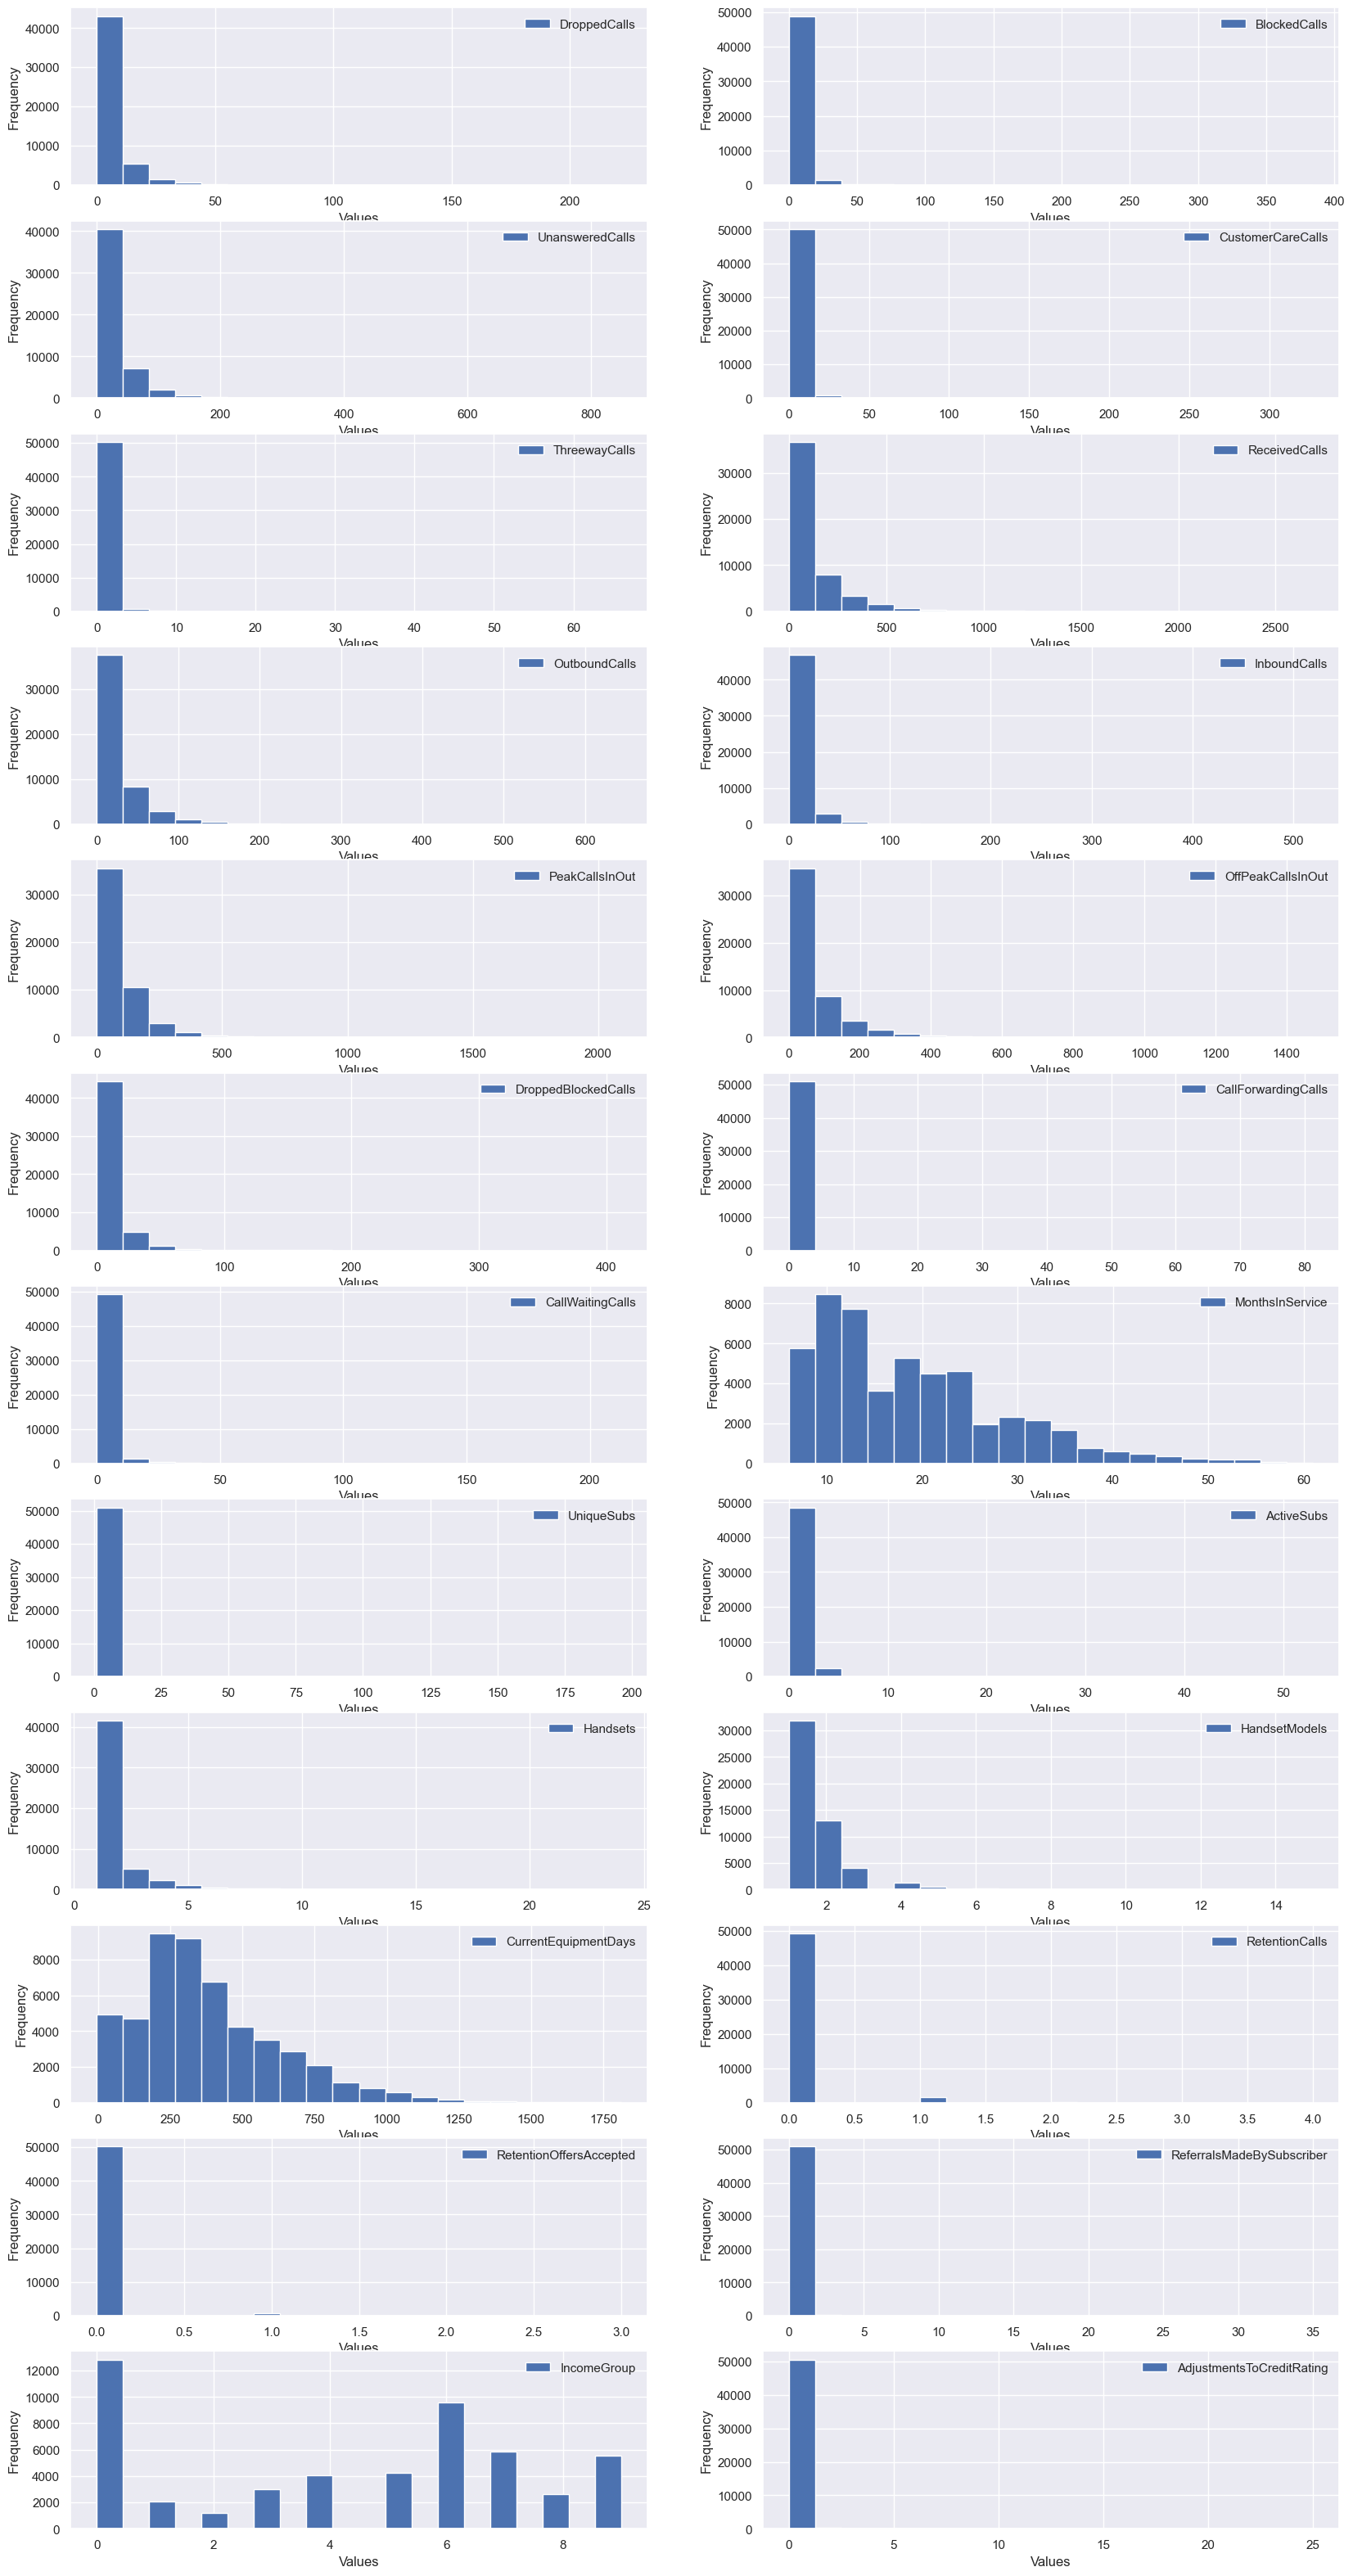

In [237]:
ncols = 2
nrows = 12
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))
col_names = ['DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating']
def plot_hist(nrows, ncols, training_set, col_names):
    # Lazy counter so we can remove unwated axes
    counter = 0
    for i in range(nrows):
        for j in range(ncols):
            ax = axes[i][j]

            # Plot when we have data
            if counter < len(col_names):
                ax.hist(training_set[col_names[counter]], bins=20, label='{}'.format(col_names[counter]))
                ax.set_xlabel('Values')
                ax.set_ylabel('Frequency')
                leg = ax.legend(loc='upper right')
                leg.draw_frame(False)

            # To remove extra axes at the bottom
            else:
                ax.set_axis_off()

            counter += 1
    plt.show()
plot_hist(nrows, ncols, training_set, col_names)

In [238]:
col_names.remove('IncomeGroup')

In [239]:
training_set['CurrentEquipmentDays'] = training_set['CurrentEquipmentDays'].transform(lambda x: x if x > 0 else 0) # To be able to apply sqrt transformation to this column 

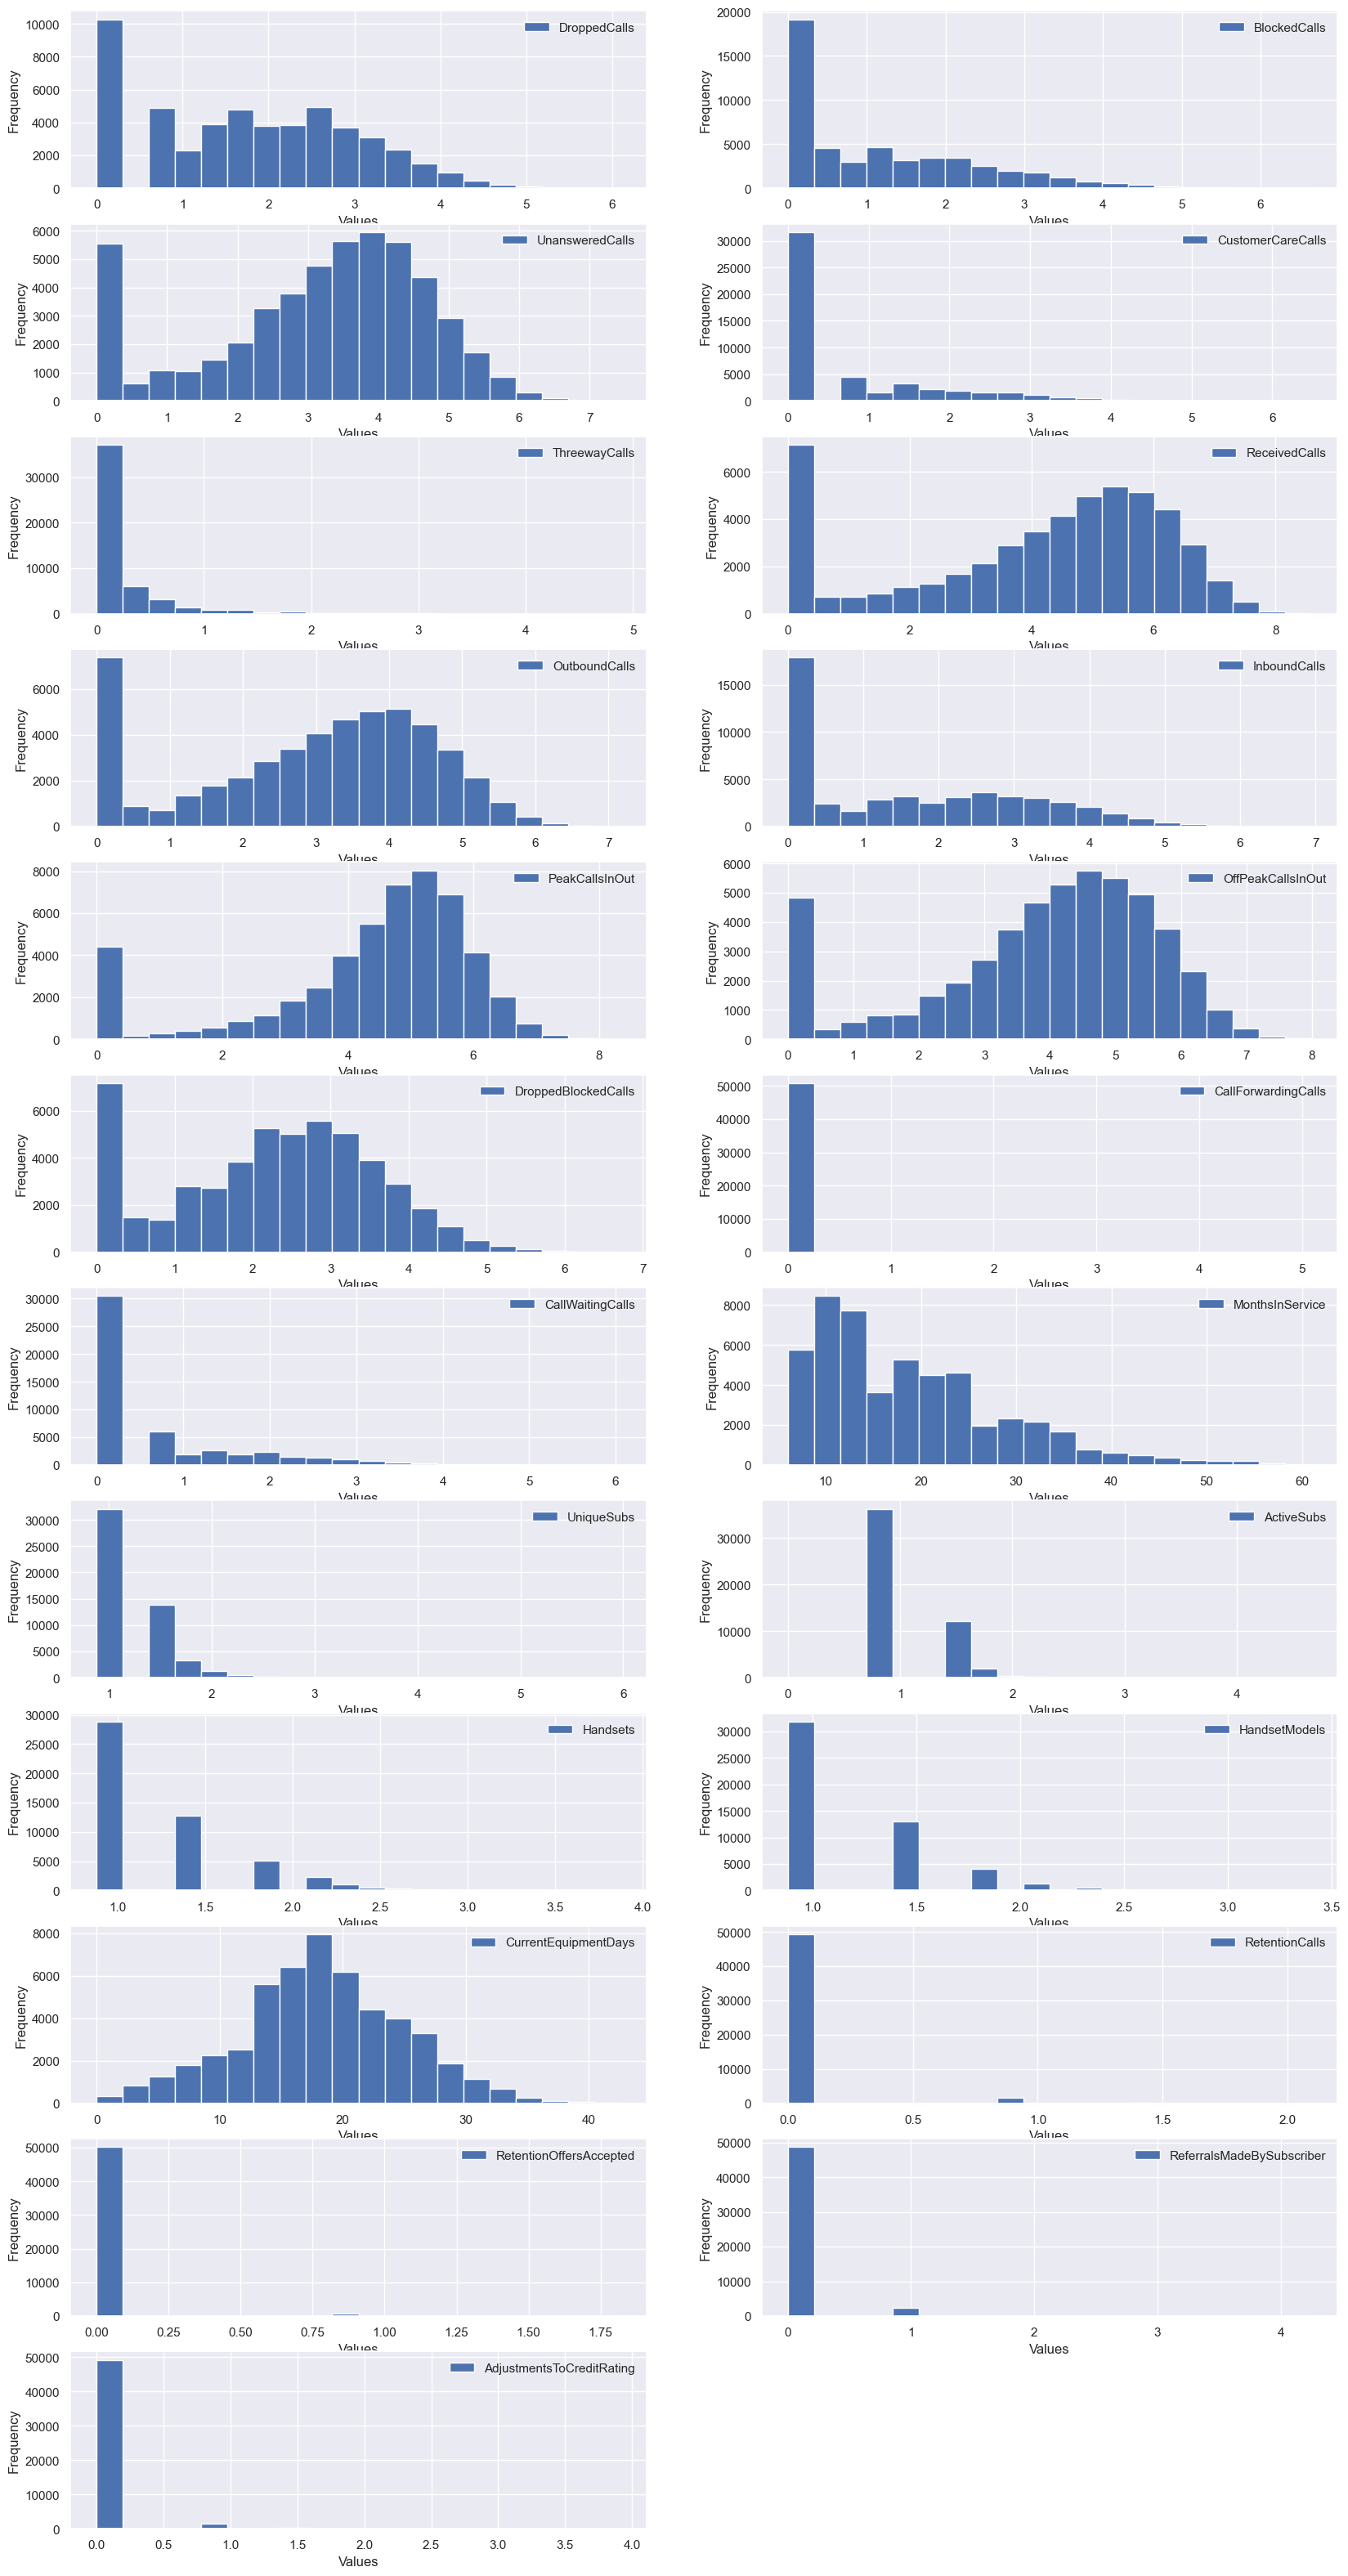

MonthlyRevenue column missing values: 156, datatype: float64
MonthlyMinutes column missing values: 156, datatype: float64
TotalRecurringCharge column missing values: 156, datatype: float64
DirectorAssistedCalls column missing values: 156, datatype: float64
OverageMinutes column missing values: 156, datatype: float64
RoamingCalls column missing values: 156, datatype: float64
PercChangeMinutes column missing values: 367, datatype: float64
PercChangeRevenues column missing values: 367, datatype: float64
AgeHH1 column missing values: 909, datatype: float64
AgeHH2 column missing values: 909, datatype: float64


In [240]:
transformed_set = training_set
for col in col_names:
    if col == 'MonthsInService':
        pass
    elif col == 'CurrentEquipmentDays':
        transformed_set[col] = transformed_set[col].transform(lambda x: np.sqrt(x))
        # Square Root Transformation appears to normalize the distribution of CurrentEquipmentDays really well
    else:
        transformed_set[col] = transformed_set[col].transform(lambda x: np.arcsinh(x))

ncols = 2
nrows = 12
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))
plot_hist(nrows, ncols, transformed_set, col_names)
check_missing(transformed_set)

In [241]:
high_freq_col_names = ['BlockedCalls', 'CustomerCareCalls', 'ThreewayCalls', 'CallForwardingCalls', 'CallWaitingCalls','UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'RetentionCalls', 'ReferralsMadeBySubscriber', 'RetentionOffersAccepted', 'AdjustmentsToCreditRating']
for col in high_freq_col_names:
    print(training_set[col].value_counts())

BlockedCalls
0.000000    13912
0.295673     5254
0.652667     4526
0.881374     2966
1.078451     2633
            ...  
5.627634        1
5.853933        1
5.688342        1
5.513445        1
5.334673        1
Name: count, Length: 373, dtype: int64
CustomerCareCalls
0.000000    28020
0.295673     3613
0.652667     2736
0.881374     1785
1.078451     1616
            ...  
5.225776        1
6.302622        1
5.010680        1
4.657853        1
5.578234        1
Name: count, Length: 185, dtype: int64
ThreewayCalls
0.000000    37133
0.295673     6109
0.652667     3183
0.881374     1388
1.078451      896
            ...  
4.104567        1
4.882859        1
3.951613        1
3.653923        1
4.872198        1
Name: count, Length: 78, dtype: int64
CallForwardingCalls
0.000000    50813
0.295673      101
0.652667       50
0.881374       18
1.443635       13
1.078451       11
1.570279        8
1.300820        5
2.019261        3
1.719052        2
2.094713        2
2.312438        2
4.713208 

In [242]:
transformed_set['AdjustmentsToCreditRating']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.881374
           ...   
51042    0.000000
51043    0.881374
51044    0.881374
51045    0.000000
51046    0.881374
Name: AdjustmentsToCreditRating, Length: 51047, dtype: float64

In [243]:
for col in high_freq_col_names:
    # 역변환 및 빈도에 따른 그룹화 병합
    value_counts = transformed_set[col].value_counts()  # 빈도 계산을 한 번만 수행
    transformed_set[col] = transformed_set[col].apply(
        lambda x: str(np.round(np.sinh(x), 1)) if value_counts[x] > 10000 else 'Other'
    )


In [244]:
transformed_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  object 
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  obj

In [245]:
transformed_set['ServiceArea'] = transformed_set.ServiceArea.str[:3]

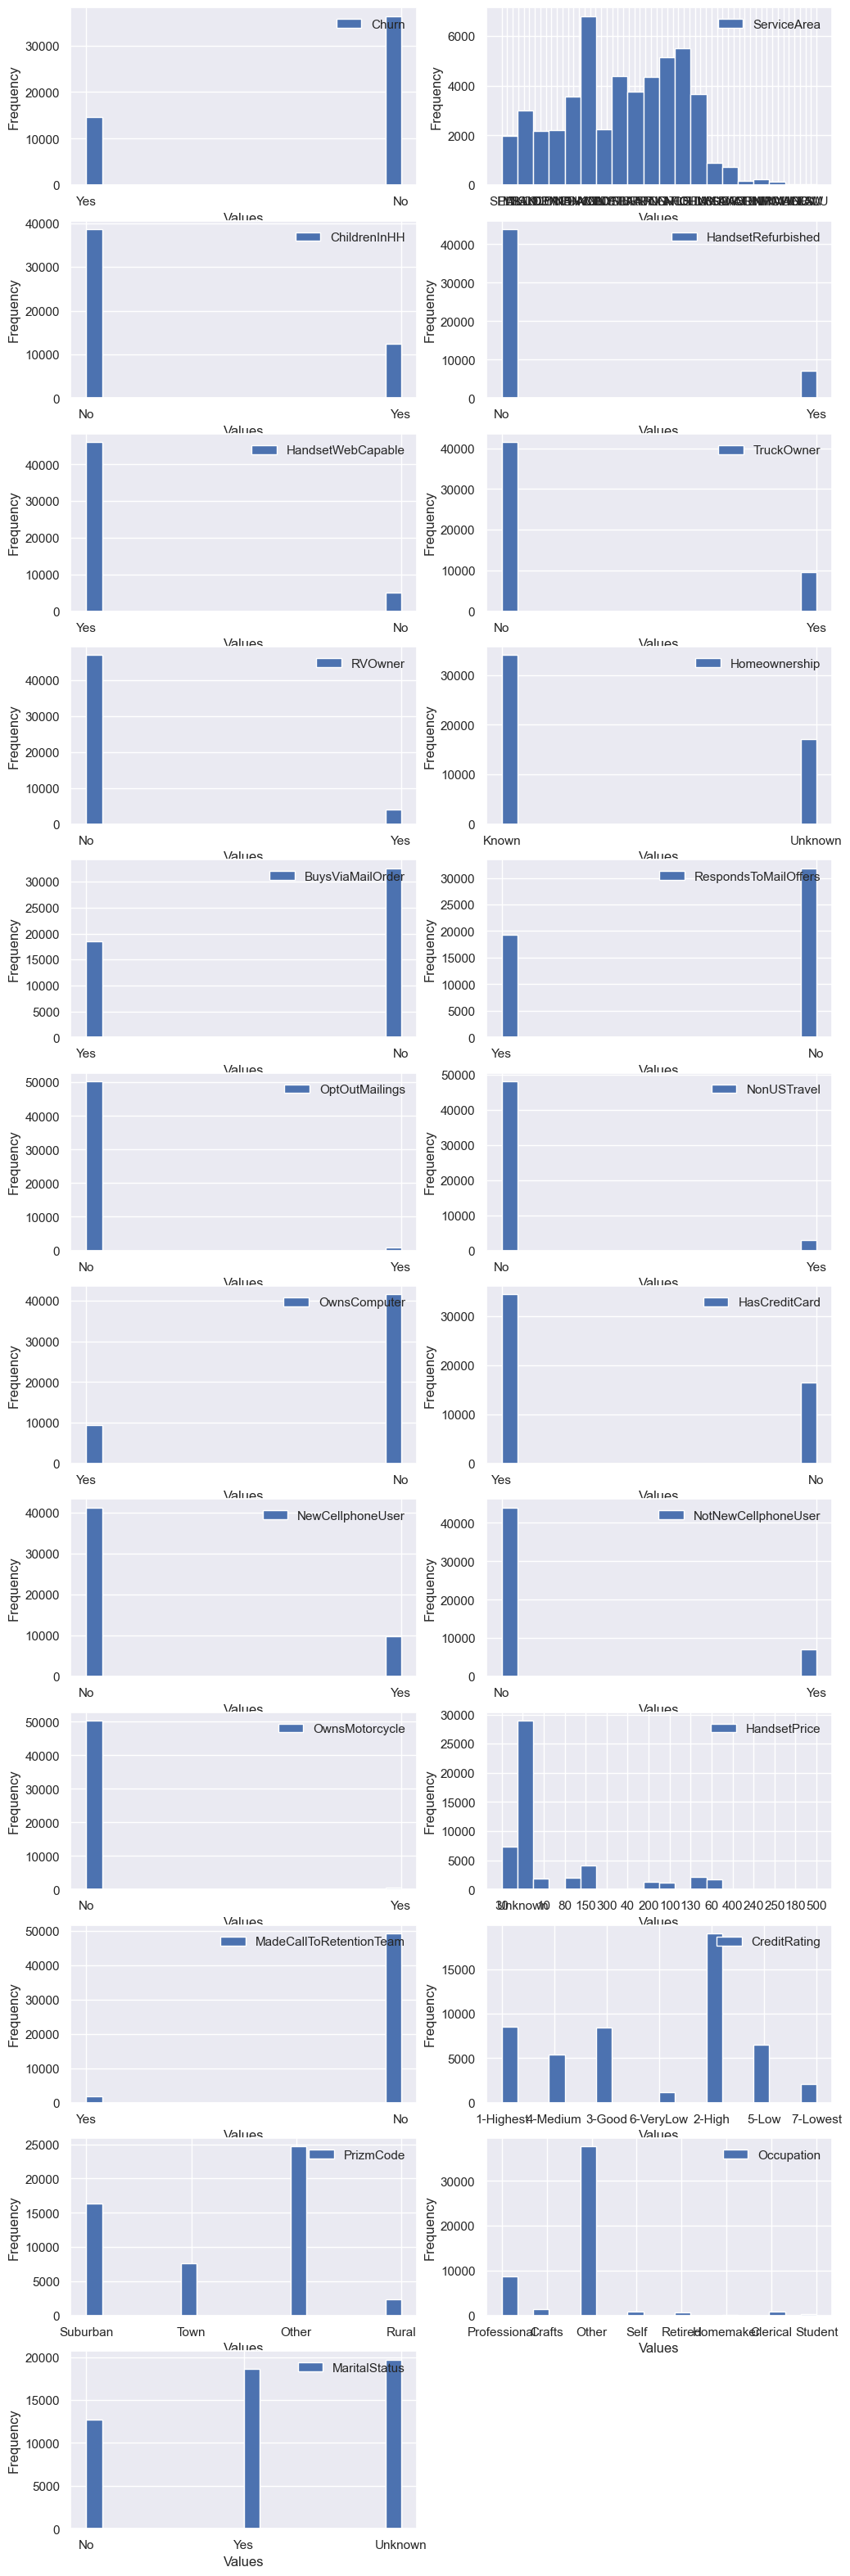

In [246]:
cat_col_names = list(transformed_set.select_dtypes(include=['object']).columns)
for col in cat_col_names:
    if col in high_freq_col_names:
        cat_col_names.remove(col)
# For some unknown reason these columns are not removed from the list otherwise
cat_col_names.remove('CustomerCareCalls')
cat_col_names.remove('CallForwardingCalls')
cat_col_names.remove('UniqueSubs')
cat_col_names.remove('HandsetModels')
cat_col_names.remove('RetentionOffersAccepted')
ncols = 2
nrows = 12
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 40))

plot_hist(nrows, ncols, transformed_set, cat_col_names)

In [247]:
dict = {'No':0 , 'Yes':1}
unwanted = ['CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus', 'ServiceArea', 'Homeownership', 'HandsetPrice'] # Removing non-binary columns
cat_cols = []
for col in cat_col_names:
    if col not in unwanted:
        cat_cols.append(col)

for name in cat_cols:
    transformed_set[name] = transformed_set[name].map(dict)
transformed_set["Homeownership"] = transformed_set["Homeownership"].map({'Known':1, 'Unknown': 0})    
transformed_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  int64  
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  object 
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  obj

In [248]:
print(transformed_set['HandsetPrice'].value_counts())
# Since nearly 57% of the values (28982 out of 51047) are unknown, so any imputation would heavily skew the data, I have decided to drop the feature

transformed_set = transformed_set.drop('HandsetPrice', axis='columns')

HandsetPrice
Unknown    28982
30          7328
150         4115
130         2105
80          1960
10          1928
60          1776
200         1266
100         1235
40           249
400           46
250           20
300           13
180           10
500            8
240            6
Name: count, dtype: int64


In [249]:
transformed_set['CreditRating'] = transformed_set.CreditRating.str[0].astype(float)

In [250]:
def ohe_cat(ColName, training_set):
    encoder = OneHotEncoder(sparse_output=False)
    encoded_cat = encoder.fit_transform(np.array(training_set[ColName]).reshape(-1,1))
    encoded_cat = pd.DataFrame(encoded_cat, columns=[f'{ColName}_{cat}' for cat in sorted(training_set[ColName].unique())])
    training_set = training_set.drop(ColName, axis='columns')
    training_set = pd.concat([training_set, encoded_cat], axis=1)
    return training_set
transformed_set = ohe_cat('ServiceArea', transformed_set)

In [251]:
transformed_set

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ServiceArea_SEA,ServiceArea_SEW,ServiceArea_SFR,ServiceArea_SFU,ServiceArea_SHE,ServiceArea_SLC,ServiceArea_SLU,ServiceArea_STL,ServiceArea_Unk,ServiceArea_VAH
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51043,3399974,0,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51044,3399978,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51045,3399990,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [252]:
transformed_set = ohe_cat('MaritalStatus', transformed_set)
transformed_set

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ServiceArea_SFU,ServiceArea_SHE,ServiceArea_SLC,ServiceArea_SLU,ServiceArea_STL,ServiceArea_Unk,ServiceArea_VAH,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
51043,3399974,0,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
51044,3399978,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
51045,3399990,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [253]:
transformed_set = ohe_cat('PrizmCode', transformed_set)
transformed_set

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ServiceArea_STL,ServiceArea_Unk,ServiceArea_VAH,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
51043,3399974,0,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
51044,3399978,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
51045,3399990,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [254]:
transformed_set = ohe_cat('Occupation', transformed_set)
transformed_set

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,PrizmCode_Suburban,PrizmCode_Town,Occupation_Clerical,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
51043,3399974,0,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
51044,3399978,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51045,3399990,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [255]:
label_encoder = LabelEncoder()
for col in high_freq_col_names:
  if len(transformed_set[col].unique()) == 2:
    transformed_set[col] = label_encoder.fit_transform(transformed_set[col])
  else:
    transformed_set = ohe_cat(col, transformed_set)

transformed_set

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,UniqueSubs_Other,ActiveSubs_1.0,ActiveSubs_2.0,ActiveSubs_Other,Handsets_1.0,Handsets_2.0,Handsets_Other,HandsetModels_1.0,HandsetModels_2.0,HandsetModels_Other
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
51043,3399974,0,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
51044,3399978,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
51045,3399990,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [256]:
transformed_set.set_index('CustomerID', inplace=True)
ds_col_names = list(transformed_set.keys())
ds_col_names

['Churn',
 'MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'OwnsMotorcycle',
 'AdjustmentsToCreditRating',
 'MadeCallToRetentionTeam',
 'CreditRating',
 'ServiceArea_AIR',
 'ServiceArea_APC',
 

In [257]:
check_missing(transformed_set)

MonthlyRevenue column missing values: 156, datatype: float64
MonthlyMinutes column missing values: 156, datatype: float64
TotalRecurringCharge column missing values: 156, datatype: float64
DirectorAssistedCalls column missing values: 156, datatype: float64
OverageMinutes column missing values: 156, datatype: float64
RoamingCalls column missing values: 156, datatype: float64
PercChangeMinutes column missing values: 367, datatype: float64
PercChangeRevenues column missing values: 367, datatype: float64
AgeHH1 column missing values: 909, datatype: float64
AgeHH2 column missing values: 909, datatype: float64


In [258]:
imputer = KNNImputer()
imputed_set = pd.DataFrame(imputer.fit_transform(transformed_set), columns=ds_col_names, index=transformed_set.index)
imputed_set

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,UniqueSubs_Other,ActiveSubs_1.0,ActiveSubs_2.0,ActiveSubs_Other,Handsets_1.0,Handsets_2.0,Handsets_Other,HandsetModels_1.0,HandsetModels_2.0,HandsetModels_Other
CustomerID,,,,,,,,,,,,,,,,,,,,,
3000002,1.0,24.000,219.0,22.0,0.250,0.0,0.00,-157.0,-19.00,0.652667,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3000010,1.0,16.990,10.0,17.0,0.000,0.0,0.00,-4.0,0.00,0.295673,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3000014,0.0,38.000,8.0,38.0,0.000,0.0,0.00,-2.0,0.00,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3000022,0.0,82.280,1312.0,75.0,1.240,0.0,0.00,157.0,8.10,4.644483,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3000026,1.0,17.140,0.0,17.0,0.000,0.0,0.00,0.0,-0.20,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399958,1.0,75.572,569.0,47.8,1.980,79.2,0.40,-35.4,6.92,2.926040,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3399974,0.0,95.170,1745.0,85.0,0.990,45.0,4.70,122.0,15.90,3.509451,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3399978,1.0,167.720,2128.8,119.6,5.198,180.6,3.38,-187.0,-21.82,4.965687,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [259]:
imputed_set.iloc[:,1:9].describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues
count,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,58.798046,525.069344,46.802151,0.894622,39.991764,1.234406,-11.497091,-1.184901
std,44.473402,529.644653,23.840908,2.225994,96.472198,9.803718,256.713522,39.459425
min,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000
25%,33.585000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.000000
50%,48.420000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000
75%,71.010000,722.000000,60.000000,0.990000,41.000000,0.300000,65.000000,1.600000
max,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000


In [260]:
pd.concat([imputed_set['AgeHH1'], imputed_set['AgeHH2']], axis=1).describe()

,AgeHH1,AgeHH2
count,51047.000000,51047.000000
mean,31.191463,21.024260
std,21.969950,23.762352
min,0.000000,0.000000
25%,0.000000,0.000000
50%,36.000000,0.000000
75%,48.000000,42.000000
max,99.000000,99.000000


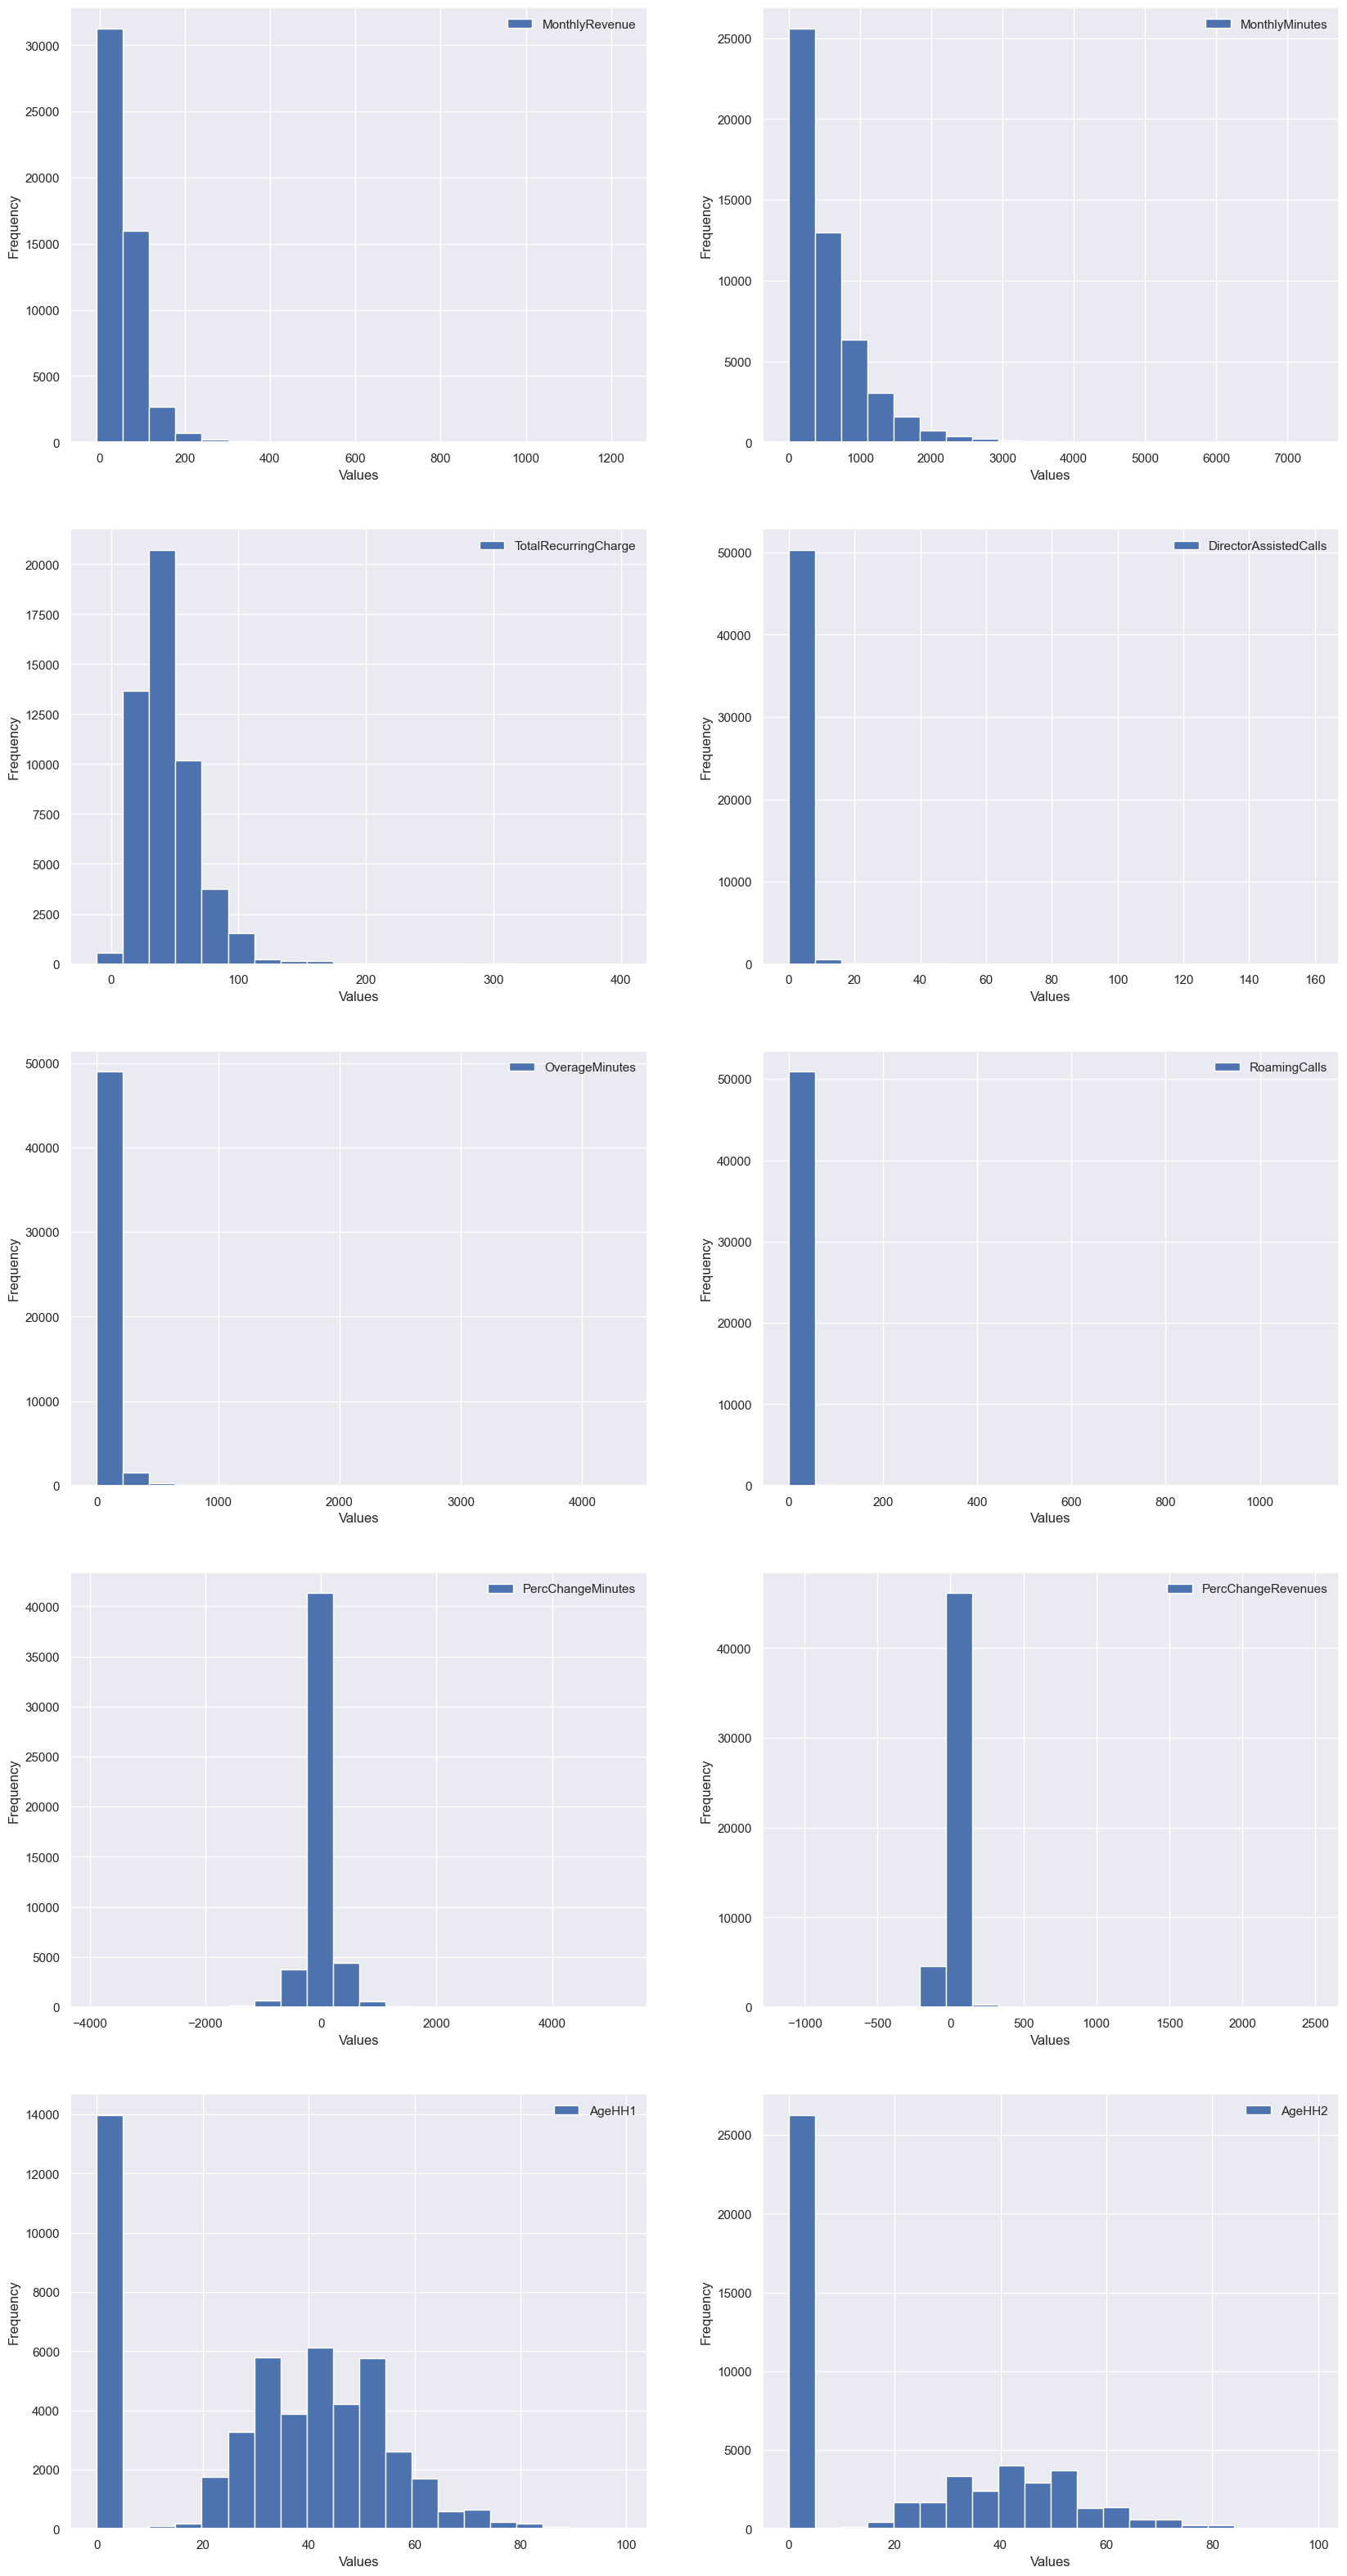

In [261]:
ncols = 2
nrows = 5
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))

last_col_names = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'AgeHH1', 'AgeHH2']
plot_hist(nrows, ncols, imputed_set, last_col_names)

In [262]:
imputed_set = imputed_set.drop(['AgeHH1','AgeHH2'], axis='columns')
last_col_names.remove('AgeHH1')
last_col_names.remove('AgeHH2')
last_col_names.remove('PercChangeMinutes')
last_col_names.remove('PercChangeRevenues')

In [263]:
last_col_names


['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls']

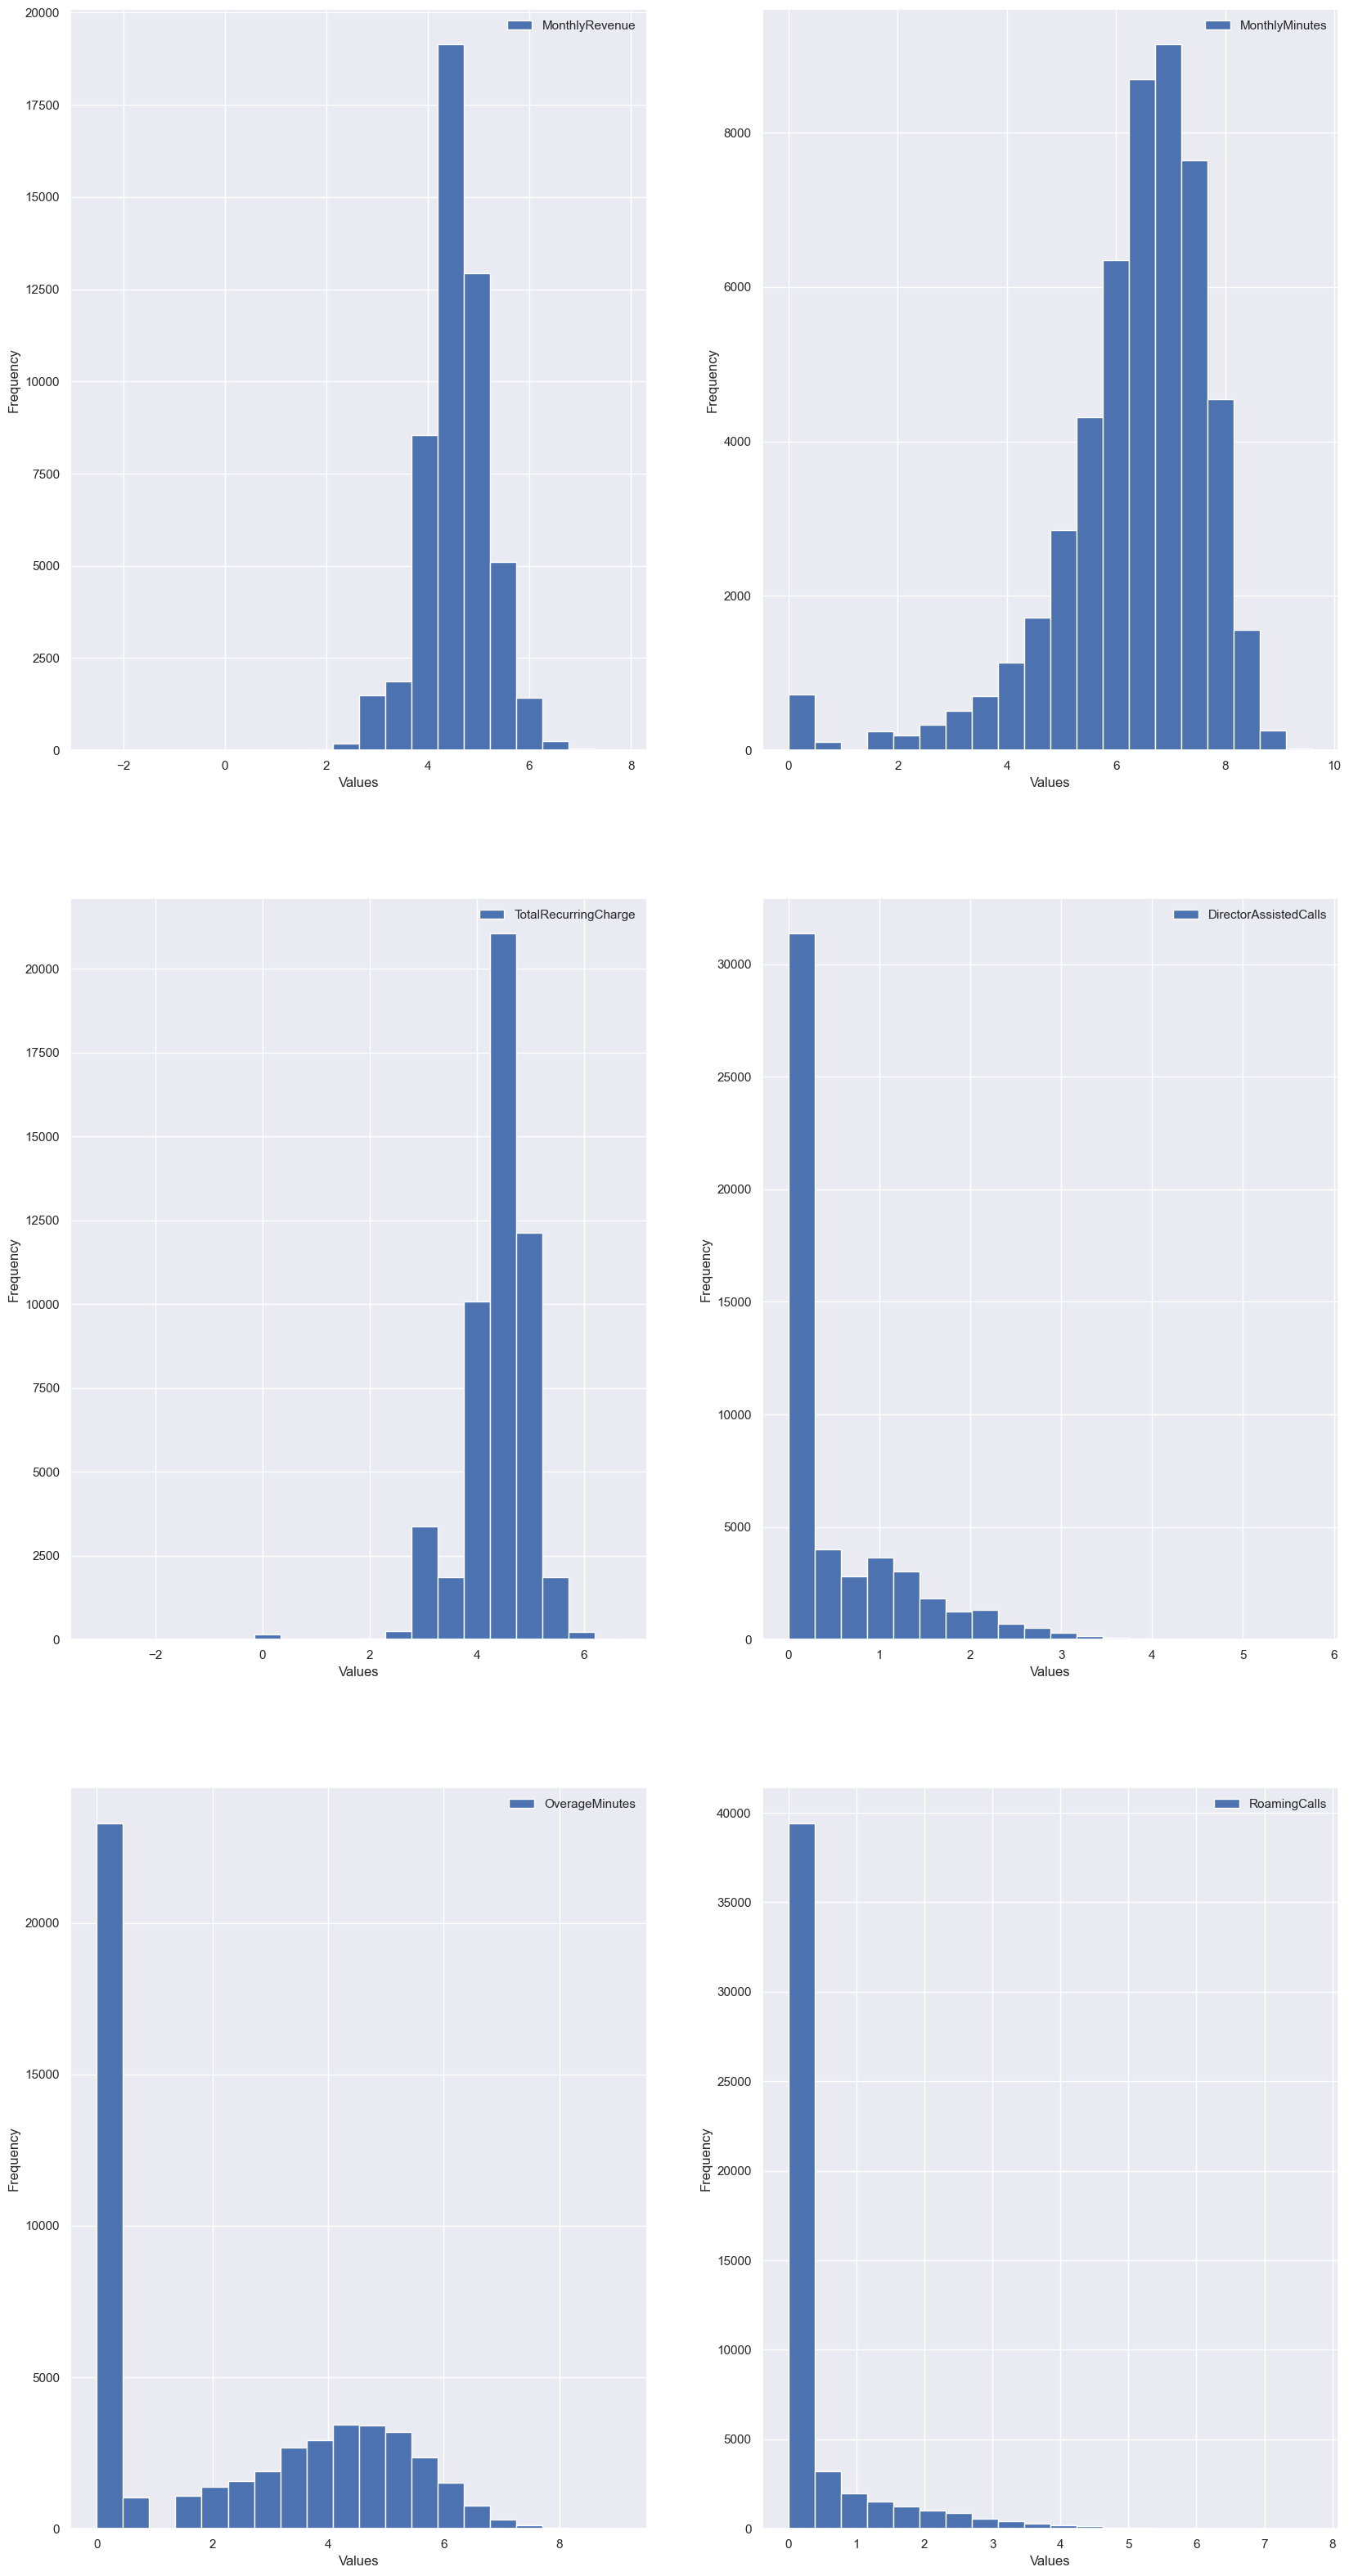

In [264]:
imputed_transformed_set = imputed_set
for col in last_col_names:
    imputed_transformed_set[col] = imputed_transformed_set[col].transform(lambda x: np.arcsinh(x))
ncols = 2
nrows = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))
plot_hist(nrows, ncols, imputed_transformed_set, last_col_names)
check_missing(imputed_transformed_set)


In [265]:
for col in ['RoamingCalls', 'DirectorAssistedCalls']:
    imputed_transformed_set[col] = imputed_transformed_set[col].transform(lambda x: np.sinh(x)) #Reversing the transformation
    imputed_transformed_set[col] = imputed_transformed_set[col].transform(lambda x: str(x) if imputed_transformed_set[col].value_counts()[x] > 10000 else 'Other')
    if len(imputed_transformed_set[col].unique()) == 2:
      imputed_transformed_set[col] = label_encoder.fit_transform(imputed_transformed_set[col])
    else:
      imputed_transformed_set = ohe_cat(col, imputed_transformed_set)

imputed_transformed_set

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,UniqueSubs_Other,ActiveSubs_1.0,ActiveSubs_2.0,ActiveSubs_Other,Handsets_1.0,Handsets_2.0,Handsets_Other,HandsetModels_1.0,HandsetModels_2.0,HandsetModels_Other
CustomerID,,,,,,,,,,,,,,,,,,,,,
3000002,1.0,3.871635,6.082224,3.784706,1,0.000000,0,-157.0,-19.00,0.652667,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3000010,1.0,3.526637,2.998223,3.527224,0,0.000000,0,-4.0,0.00,0.295673,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3000014,0.0,4.330906,2.776472,4.330906,0,0.000000,0,-2.0,0.00,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3000022,0.0,5.103312,7.872455,5.010680,1,0.000000,0,157.0,8.10,4.644483,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3000026,1.0,3.535412,0.000000,3.527224,0,0.000000,0,0.0,-0.20,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399958,1.0,5.018277,7.037028,4.560282,1,5.065163,1,-35.4,6.92,2.926040,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3399974,0.0,5.248840,8.157657,5.135833,1,4.499933,1,122.0,15.90,3.509451,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3399978,1.0,5.815452,8.356461,5.477317,1,5.889439,1,-187.0,-21.82,4.965687,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [266]:
imputed_transformed_set['RoamingCalls'].value_counts()

RoamingCalls
0    35004
1    16043
Name: count, dtype: int64

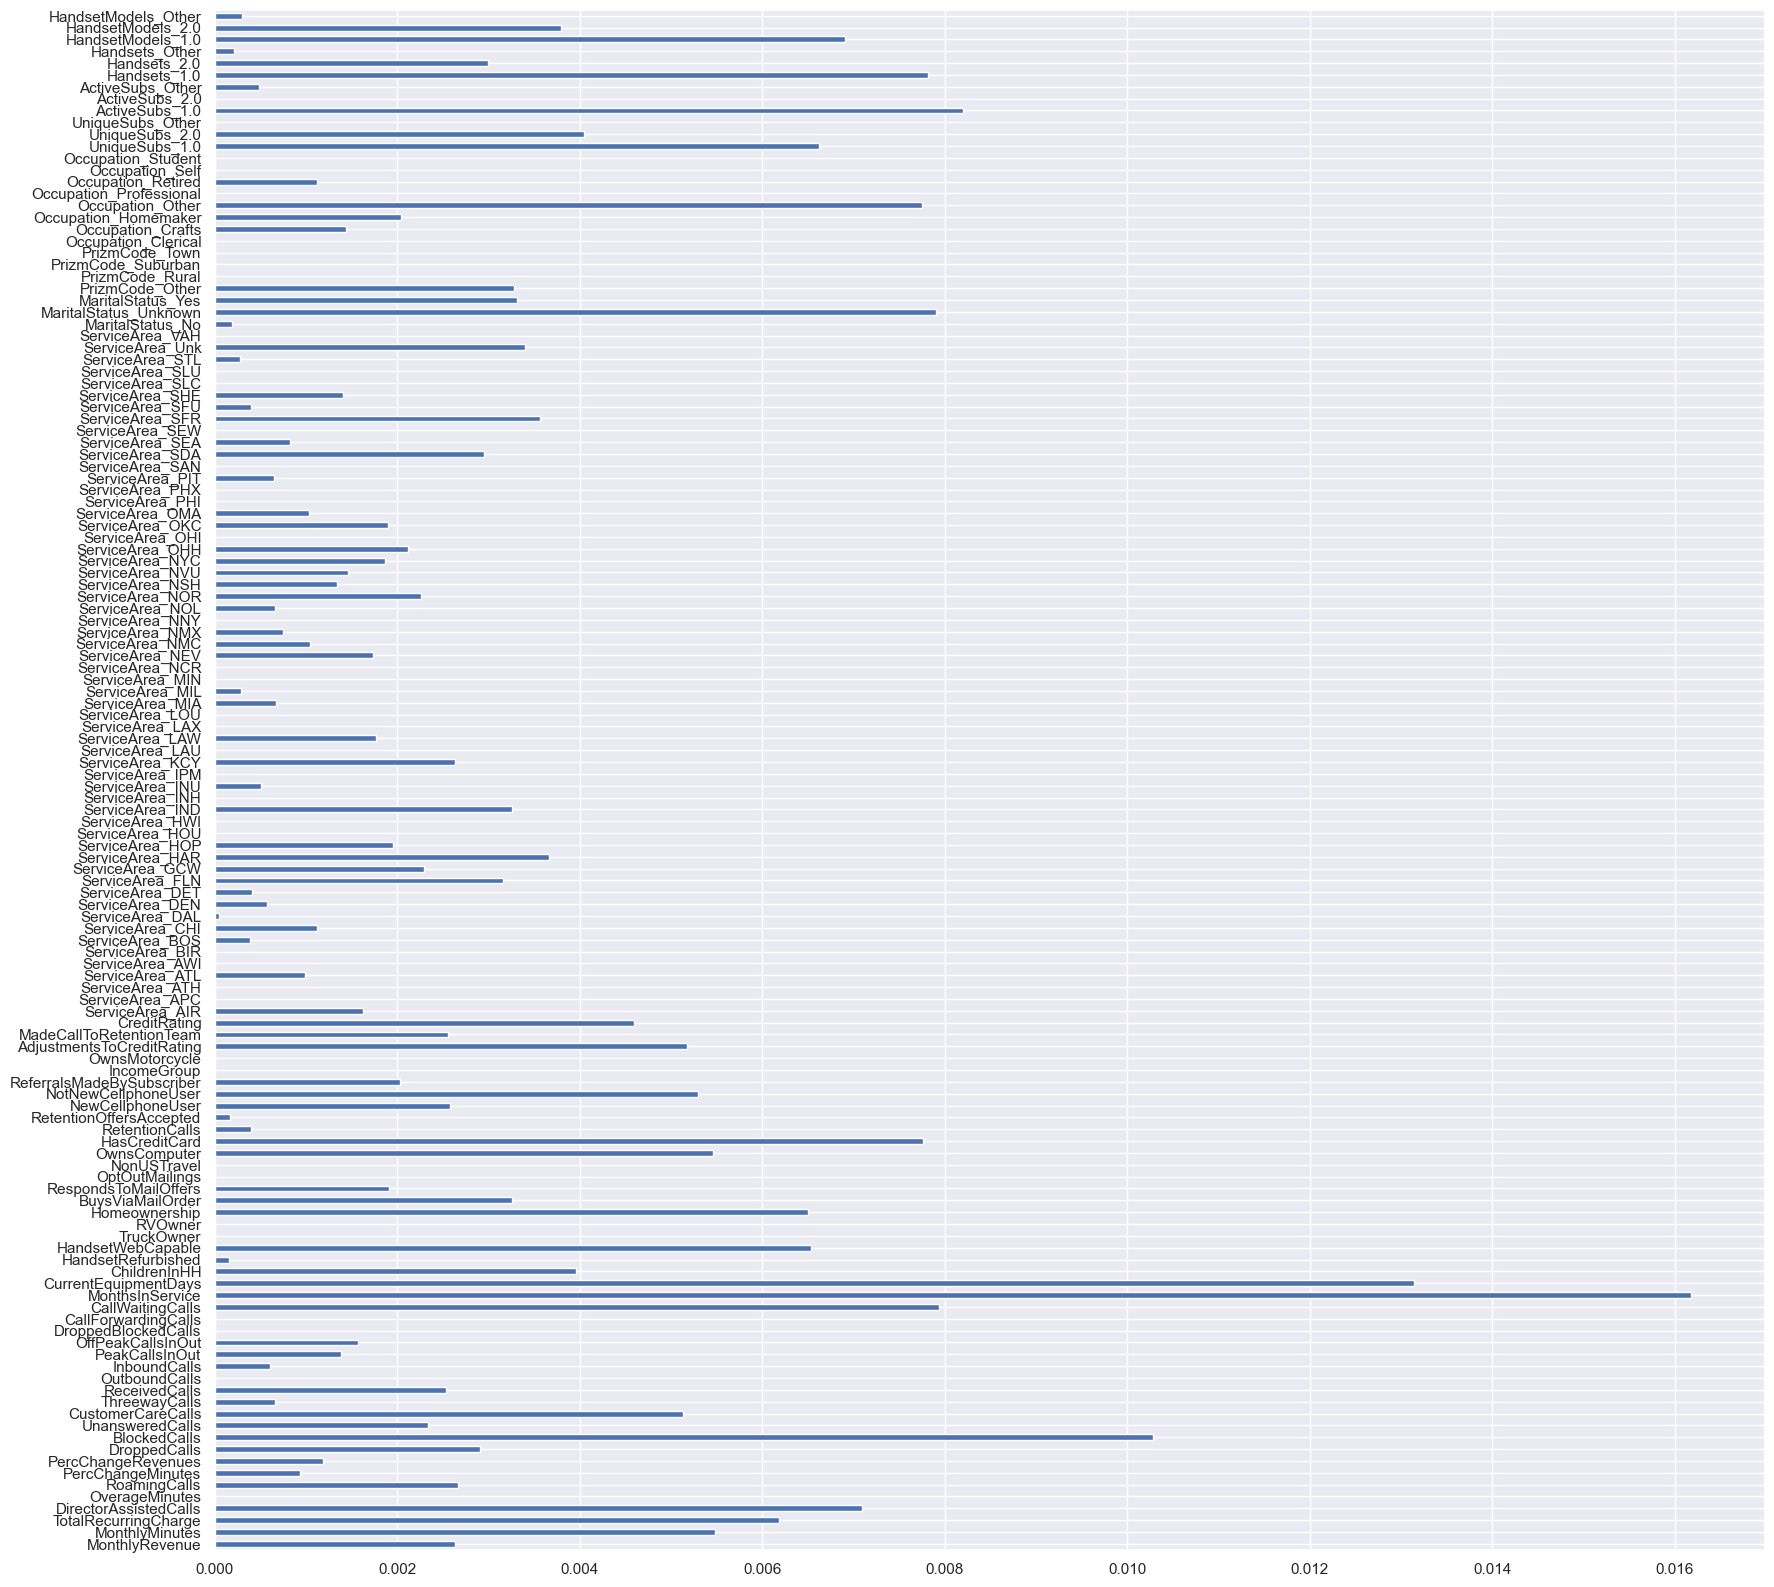

In [267]:
X = imputed_transformed_set.drop('Churn', axis='columns')
y = imputed_transformed_set['Churn']
importance = mutual_info_classif(X,y, random_state=42)
feat_importances = pd.Series(importance, X.columns)
feat_importances.plot(kind='barh')
plt.show()

C:\Users\simto\AppData\Local\Temp\ipykernel_31788\2752758832.py:4: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  feat_imp = pd.concat([feat_imp, pd.Series(feat_importances[key], index=[key])])


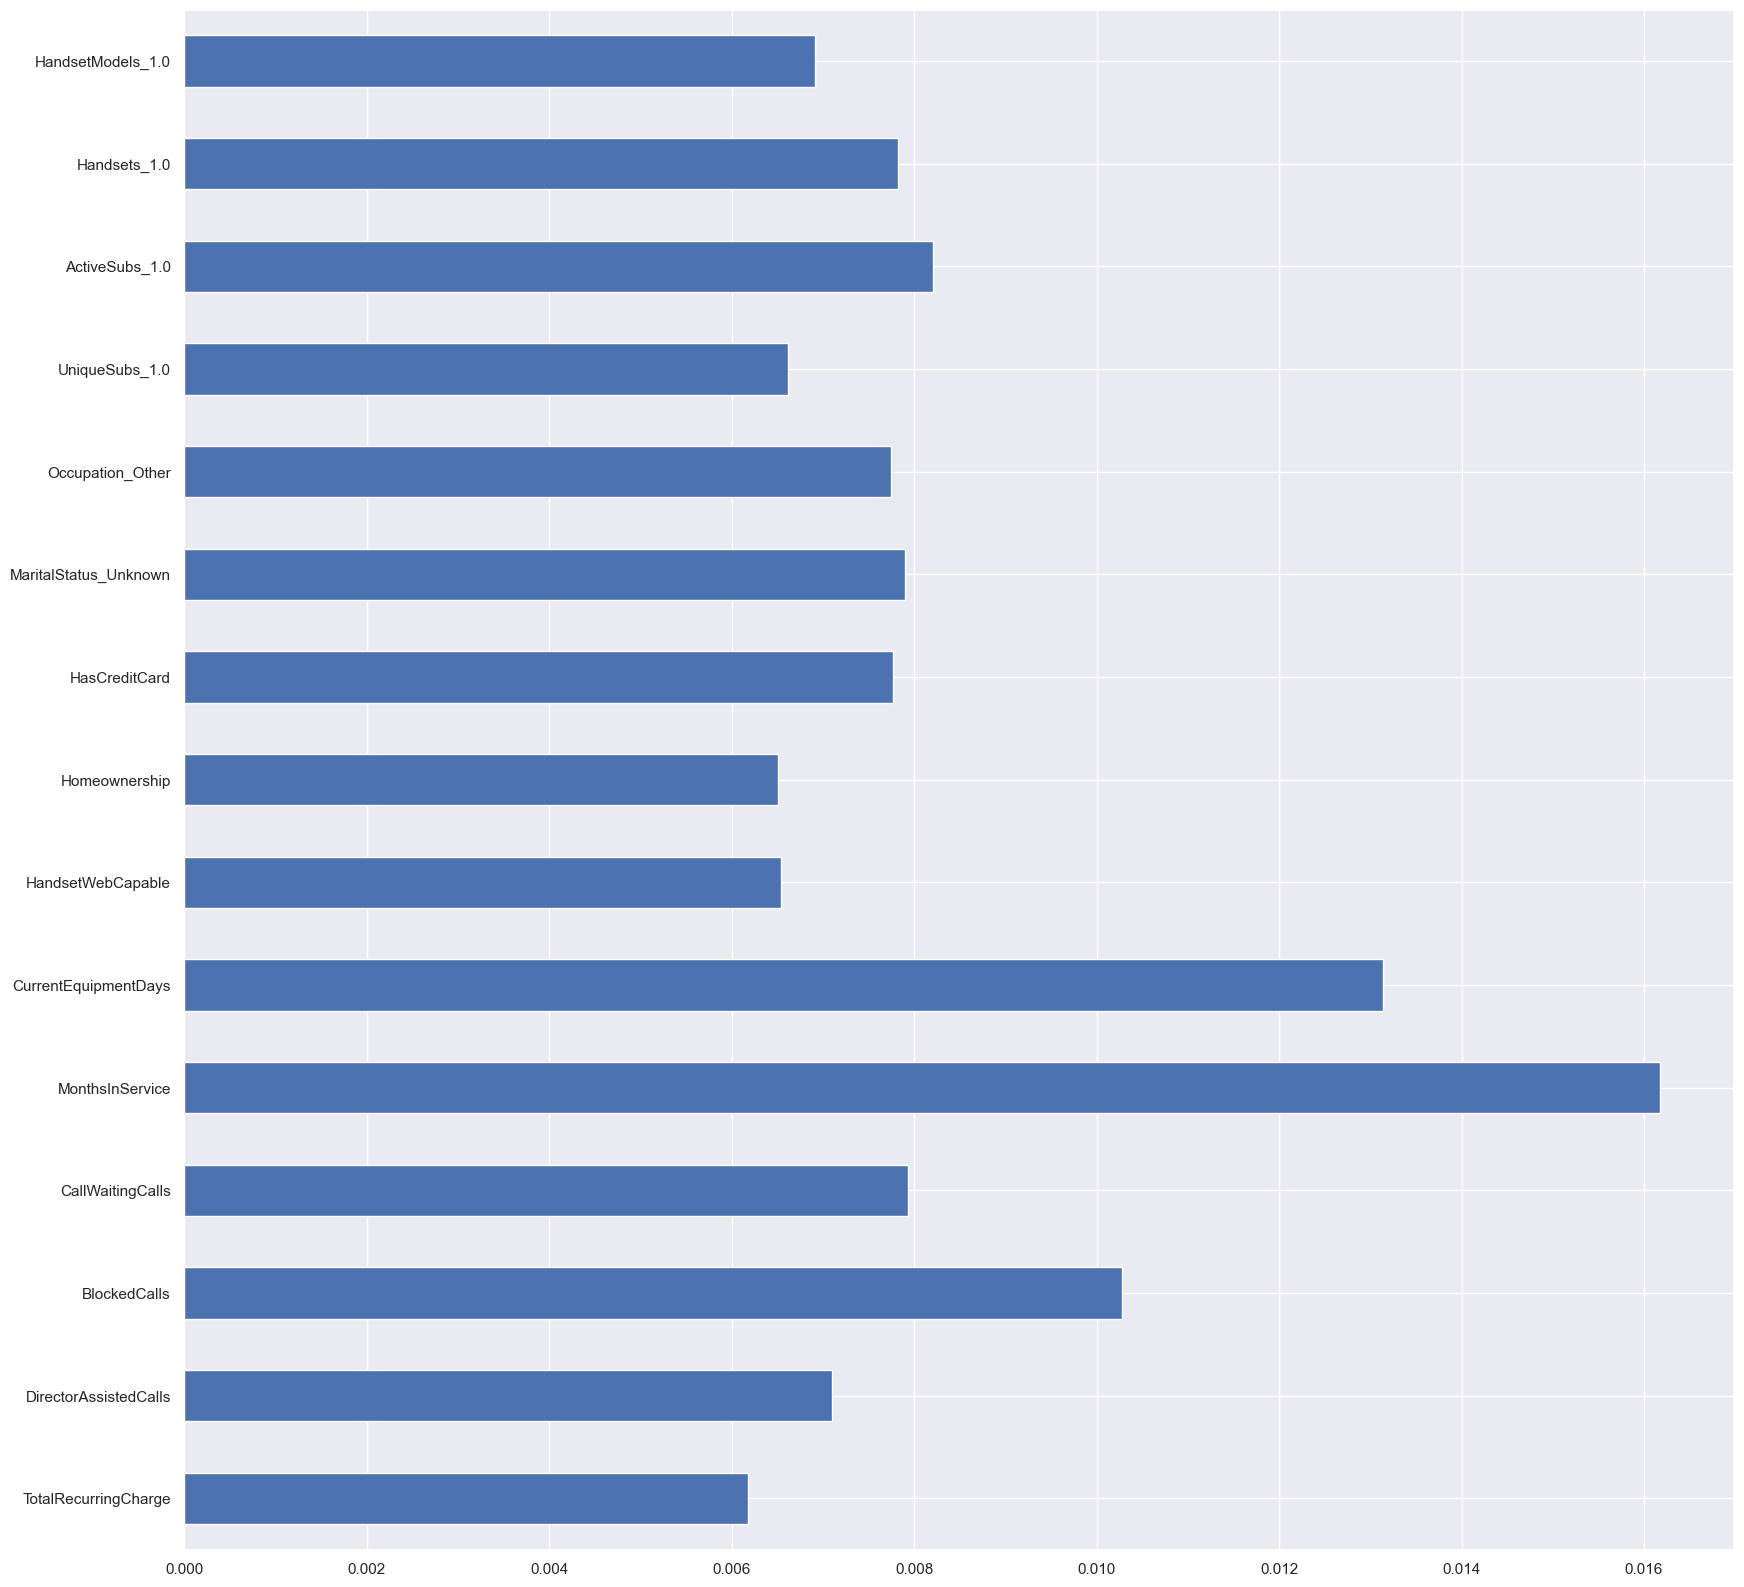

In [268]:
feat_imp = pd.Series()
for key in feat_importances.keys():
  if feat_importances[key] > 0.006:
    feat_imp = pd.concat([feat_imp, pd.Series(feat_importances[key], index=[key])])

feat_imp.plot(kind='barh')
plt.show()

In [269]:
new_feature_set = imputed_transformed_set
for col in imputed_transformed_set.columns:
  if (col not in feat_imp.keys()):
    if col != 'Churn':
      new_feature_set = new_feature_set.drop(col, axis='columns')

new_feature_set

,Churn,TotalRecurringCharge,DirectorAssistedCalls,BlockedCalls,CallWaitingCalls,MonthsInService,CurrentEquipmentDays,HandsetWebCapable,Homeownership,HasCreditCard,MaritalStatus_Unknown,Occupation_Other,UniqueSubs_1.0,ActiveSubs_1.0,Handsets_1.0,HandsetModels_1.0
CustomerID,,,,,,,,,,,,,,,,
3000002,1.0,3.784706,1,1.0,1.0,61.0,19.000000,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3000010,1.0,3.527224,0,0.0,0.0,58.0,38.781439,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
3000014,0.0,4.330906,0,0.0,0.0,60.0,42.567593,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
3000022,0.0,5.010680,1,1.0,1.0,59.0,21.400935,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3000026,1.0,3.527224,0,0.0,0.0,53.0,29.189039,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399958,1.0,4.560282,1,1.0,1.0,29.0,22.934690,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3399974,0.0,5.135833,1,1.0,1.0,29.0,21.540659,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3399978,1.0,5.477317,1,1.0,1.0,25.0,19.442222,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


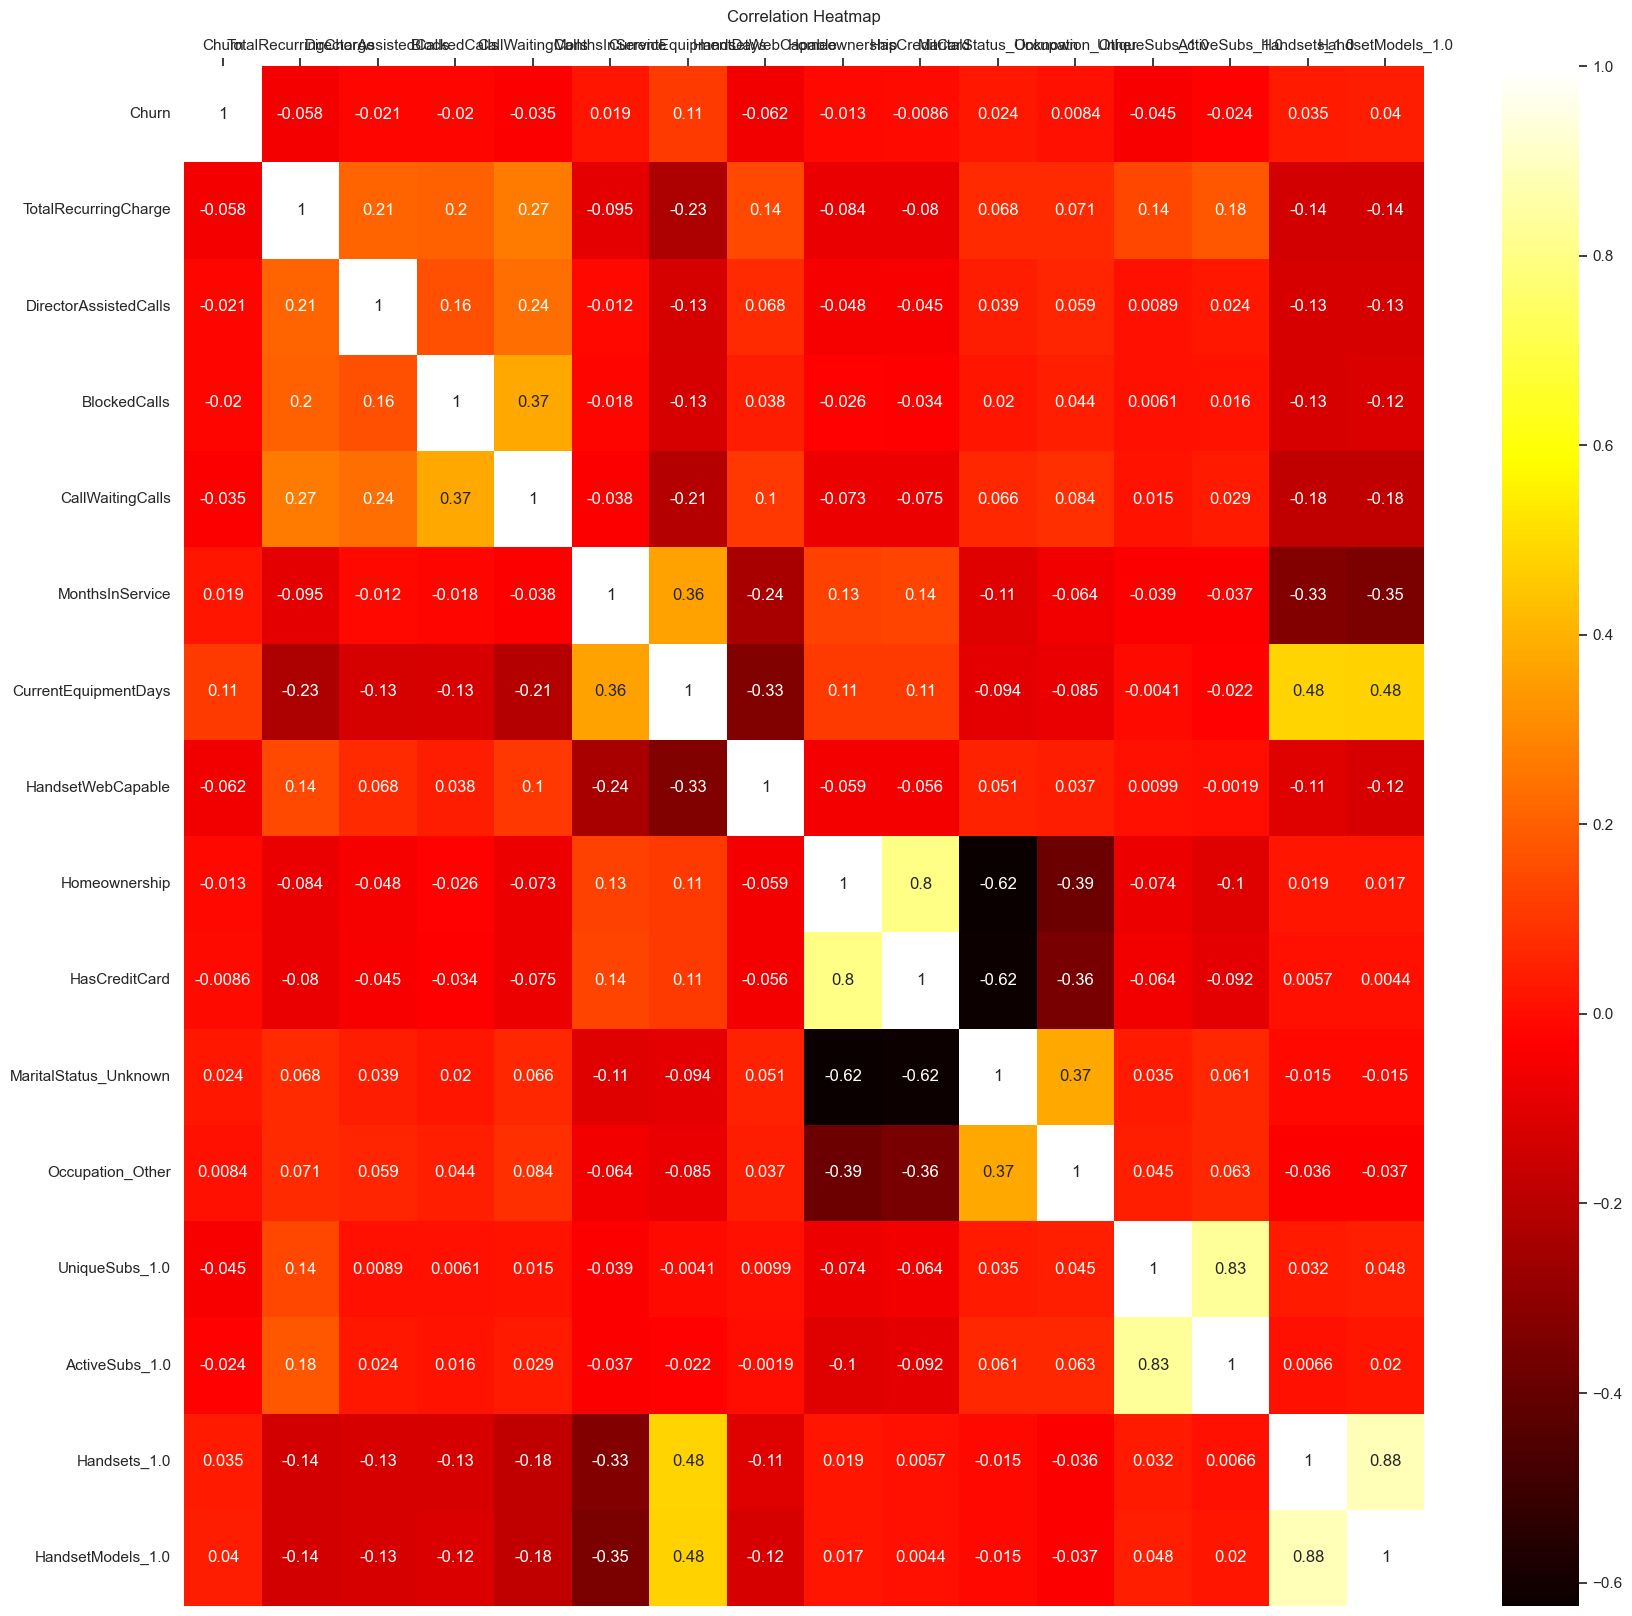

In [270]:
sns.set_theme(rc={'figure.figsize':(20,20)})
heatmap = sns.heatmap(new_feature_set.corr(), annot=True, cbar=True, cmap='hot')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
heatmap.xaxis.tick_top()
plt.show()

In [271]:
new_feature_set = new_feature_set.drop('ActiveSubs_1.0', axis='columns')
new_feature_set = new_feature_set.drop('Handsets_1.0', axis='columns')
new_feature_set = new_feature_set.drop('HasCreditCard', axis='columns')
new_feature_set = new_feature_set.drop('Homeownership', axis='columns')
new_feature_set.corr()

,Churn,TotalRecurringCharge,DirectorAssistedCalls,BlockedCalls,CallWaitingCalls,MonthsInService,CurrentEquipmentDays,HandsetWebCapable,MaritalStatus_Unknown,Occupation_Other,UniqueSubs_1.0,HandsetModels_1.0
Churn,1.000000,-0.058192,-0.021411,-0.019891,-0.034609,0.018703,0.109021,-0.062096,0.023967,0.008409,-0.044978,0.039512
TotalRecurringCharge,-0.058192,1.000000,0.211969,0.202519,0.268603,-0.094594,-0.228676,0.143897,0.068357,0.070965,0.142229,-0.142038
DirectorAssistedCalls,-0.021411,0.211969,1.000000,0.157056,0.237514,-0.011992,-0.133645,0.067657,0.039056,0.058532,0.008890,-0.125024
BlockedCalls,-0.019891,0.202519,0.157056,1.000000,0.371728,-0.017598,-0.126235,0.037601,0.020326,0.043519,0.006081,-0.120690
CallWaitingCalls,-0.034609,0.268603,0.237514,0.371728,1.000000,-0.037833,-0.211143,0.100177,0.066021,0.083779,0.015125,-0.183078
MonthsInService,0.018703,-0.094594,-0.011992,-0.017598,-0.037833,1.000000,0.363783,-0.243393,-0.108689,-0.063686,-0.038988,-0.349083
CurrentEquipmentDays,0.109021,-0.228676,-0.133645,-0.126235,-0.211143,0.363783,1.000000,-0.334683,-0.093941,-0.084707,-0.004081,0.479417
HandsetWebCapable,-0.062096,0.143897,0.067657,0.037601,0.100177,-0.243393,-0.334683,1.000000,0.051031,0.037171,0.009914,-0.124609
MaritalStatus_Unknown,0.023967,0.068357,0.039056,0.020326,0.066021,-0.108689,-0.093941,0.051031,1.000000,0.373623,0.034615,-0.014583
Occupation_Other,0.008409,0.070965,0.058532,0.043519,0.083779,-0.063686,-0.084707,0.037171,0.373623,1.000000,0.044506,-0.037126


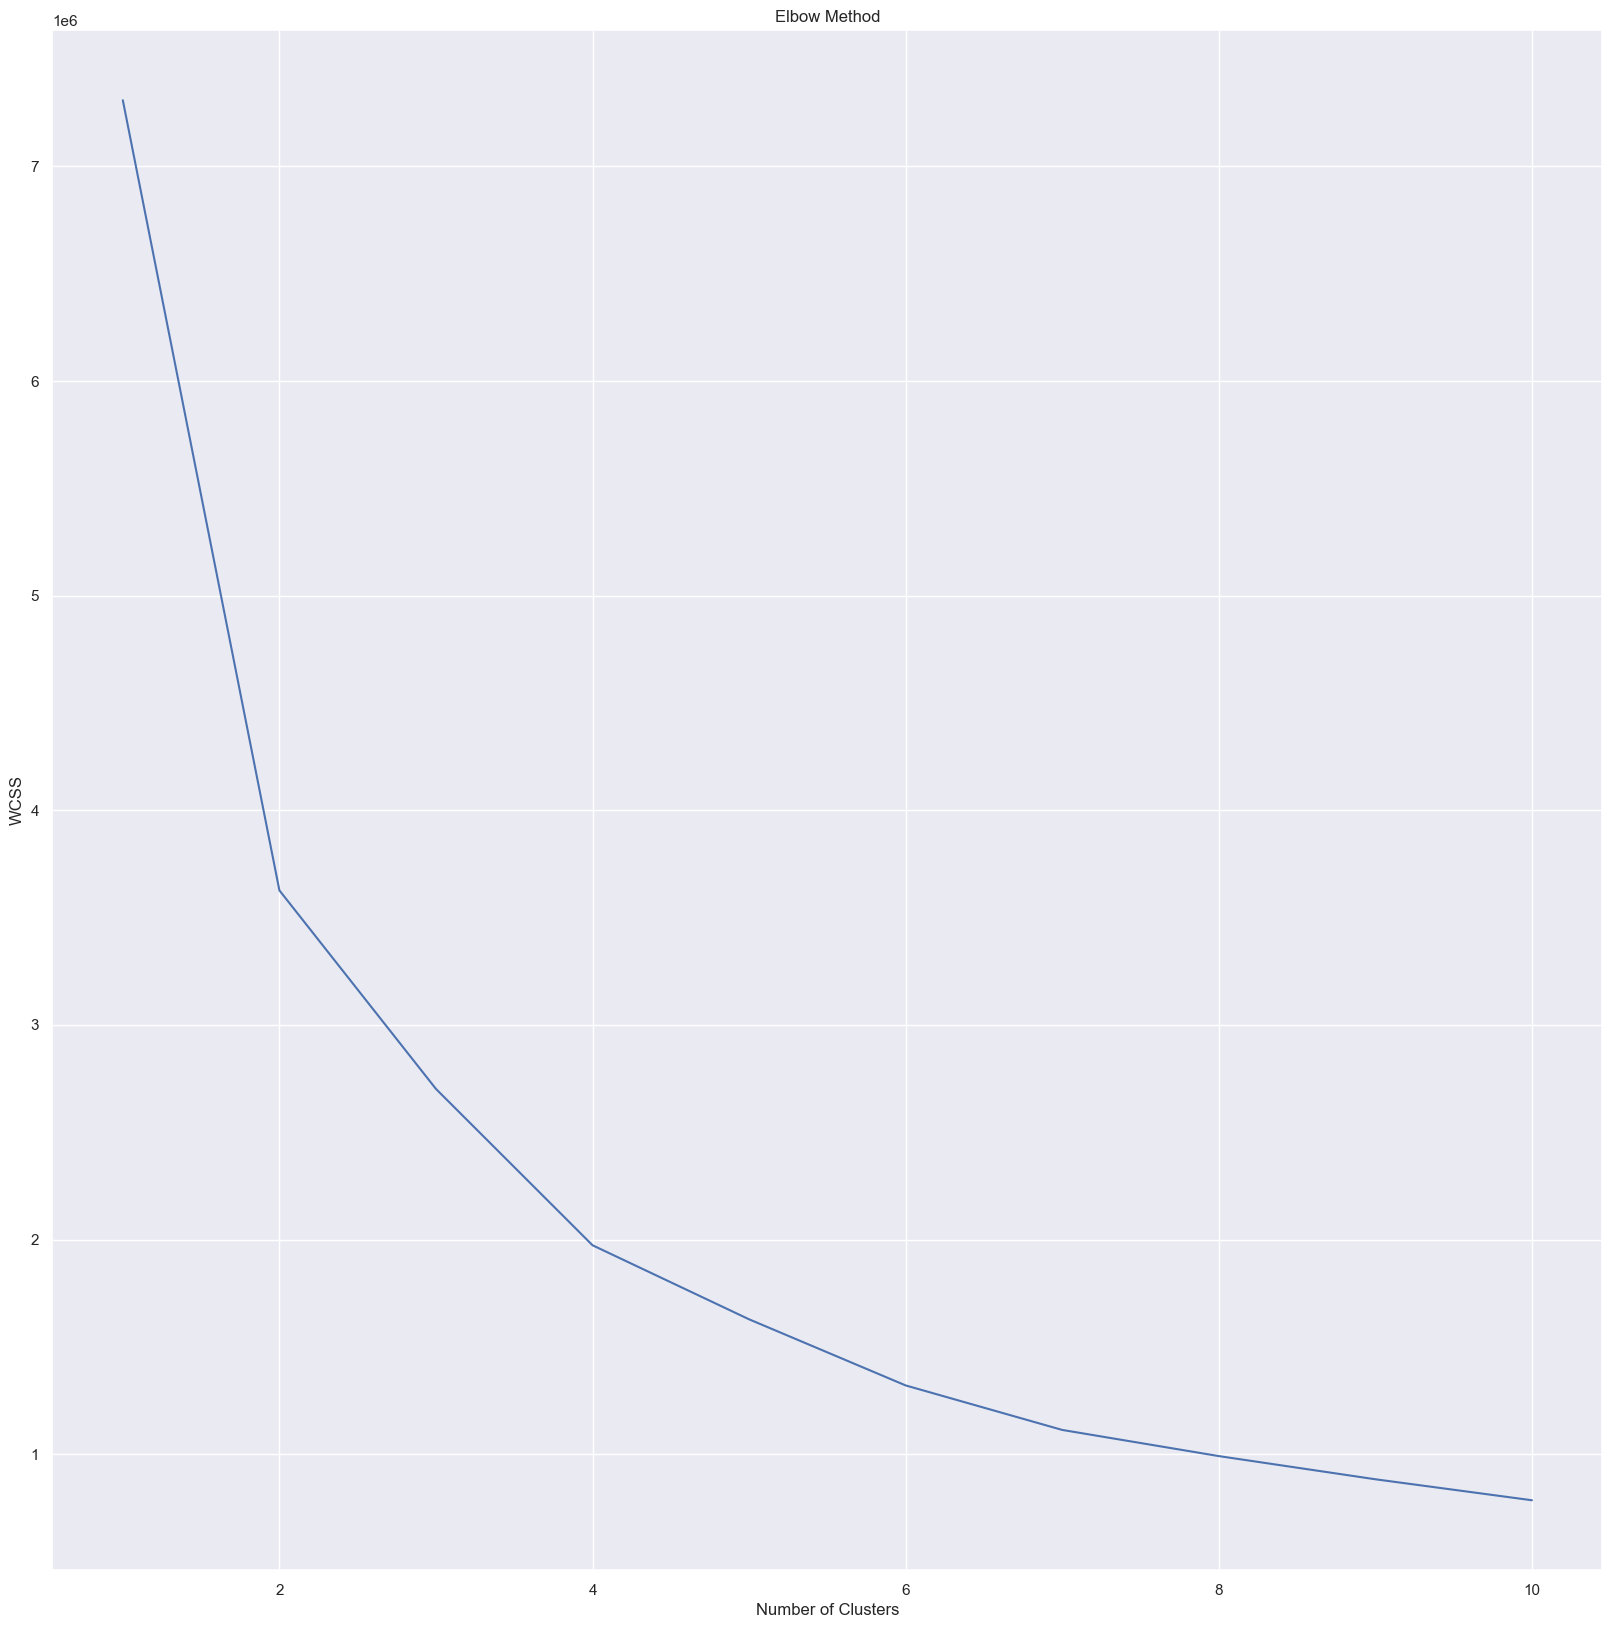

In [272]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto')
    kmeans.fit(new_feature_set)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11) , wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [273]:
CLUSTERS = 4

In [274]:
kmeans = KMeans(n_clusters=CLUSTERS, init='k-means++', n_init='auto', random_state = 0)
y_kmeans = kmeans.fit_predict(X)


In [276]:
y_kmeans = pd.Series(y_kmeans, index=new_feature_set.index)
new_feature_set = pd.concat([new_feature_set, y_kmeans], axis = 1)
new_feature_set = pd.DataFrame(new_feature_set)
new_feature_set.rename(columns = {list(new_feature_set)[8]:'Cluster'}, inplace = True)
new_feature_set

,Churn,TotalRecurringCharge,DirectorAssistedCalls,BlockedCalls,CallWaitingCalls,MonthsInService,CurrentEquipmentDays,HandsetWebCapable,Cluster,Occupation_Other,UniqueSubs_1.0,HandsetModels_1.0,0
CustomerID,,,,,,,,,,,,,
3000002,1.0,3.784706,1,1.0,1.0,61.0,19.000000,1.0,0.0,0.0,0.0,0.0,1
3000010,1.0,3.527224,0,0.0,0.0,58.0,38.781439,0.0,0.0,0.0,1.0,1.0,0
3000014,0.0,4.330906,0,0.0,0.0,60.0,42.567593,0.0,0.0,0.0,1.0,1.0,0
3000022,0.0,5.010680,1,1.0,1.0,59.0,21.400935,1.0,0.0,1.0,0.0,0.0,0
3000026,1.0,3.527224,0,0.0,0.0,53.0,29.189039,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399958,1.0,4.560282,1,1.0,1.0,29.0,22.934690,1.0,0.0,1.0,1.0,0.0,0
3399974,0.0,5.135833,1,1.0,1.0,29.0,21.540659,1.0,0.0,1.0,1.0,0.0,0
3399978,1.0,5.477317,1,1.0,1.0,25.0,19.442222,1.0,0.0,0.0,1.0,0.0,1


In [278]:
new_feature_set['TotalRecurringCharge'] = new_feature_set['TotalRecurringCharge'].transform(lambda x: np.sinh(x))
new_feature_set['CurrentEquipmentDays'] = new_feature_set['CurrentEquipmentDays'].transform(lambda x: x*x)

new_feature_set

,Churn,TotalRecurringCharge,DirectorAssistedCalls,BlockedCalls,CallWaitingCalls,MonthsInService,CurrentEquipmentDays,HandsetWebCapable,Cluster,Occupation_Other,UniqueSubs_1.0,HandsetModels_1.0,0
CustomerID,,,,,,,,,,,,,
3000002,1.0,22.0,1,1.0,1.0,61.0,361.0,1.0,0.0,0.0,0.0,0.0,1
3000010,1.0,17.0,0,0.0,0.0,58.0,1504.0,0.0,0.0,0.0,1.0,1.0,0
3000014,0.0,38.0,0,0.0,0.0,60.0,1812.0,0.0,0.0,0.0,1.0,1.0,0
3000022,0.0,75.0,1,1.0,1.0,59.0,458.0,1.0,0.0,1.0,0.0,0.0,0
3000026,1.0,17.0,0,0.0,0.0,53.0,852.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399958,1.0,47.8,1,1.0,1.0,29.0,526.0,1.0,0.0,1.0,1.0,0.0,0
3399974,0.0,85.0,1,1.0,1.0,29.0,464.0,1.0,0.0,1.0,1.0,0.0,0
3399978,1.0,119.6,1,1.0,1.0,25.0,378.0,1.0,0.0,0.0,1.0,0.0,1


In [279]:
cluster_1 = new_feature_set[new_feature_set['Cluster'] == 0]
cluster_2 = new_feature_set[new_feature_set['Cluster'] == 1]
cluster_3 = new_feature_set[new_feature_set['Cluster'] == 2]
cluster_4 = new_feature_set[new_feature_set['Cluster'] == 3]

In [280]:
cluster_1.describe()

,Churn,TotalRecurringCharge,DirectorAssistedCalls,BlockedCalls,CallWaitingCalls,MonthsInService,CurrentEquipmentDays,HandsetWebCapable,Cluster,Occupation_Other,UniqueSubs_1.0,HandsetModels_1.0,0
count,31347.00000,31347.000000,31347.000000,31347.000000,31347.000000,31347.000000,31347.000000,31347.000000,31347.0,31347.000000,31347.000000,31347.000000,31347.000000
mean,0.27958,45.369675,0.503621,0.720292,0.483523,19.600664,401.030816,0.890005,0.0,0.606948,0.615753,0.630140,0.367053
std,0.44880,23.415624,0.499995,0.448863,0.499736,10.040728,265.080580,0.312888,0.0,0.488436,0.486425,0.482774,0.695225
min,0.00000,-6.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.00000,30.000000,0.000000,0.000000,0.000000,11.000000,213.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.00000,45.000000,1.000000,1.000000,0.000000,18.000000,346.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.000000
75%,1.00000,59.000000,1.000000,1.000000,1.000000,25.000000,555.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000
max,1.00000,400.000000,1.000000,1.000000,1.000000,61.000000,1812.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000


In [281]:
cluster_2.describe()

,Churn,TotalRecurringCharge,DirectorAssistedCalls,BlockedCalls,CallWaitingCalls,MonthsInService,CurrentEquipmentDays,HandsetWebCapable,Cluster,Occupation_Other,UniqueSubs_1.0,HandsetModels_1.0,0
count,19700.000000,19700.000000,19700.000000,19700.000000,19700.000000,19700.000000,19700.000000,19700.000000,19700.0,19700.000000,19700.000000,19700.000000,19700.000000
mean,0.301878,49.081533,0.543706,0.738883,0.551320,17.412640,347.958962,0.921168,1.0,0.944721,0.650102,0.615635,0.499036
std,0.459084,24.329747,0.498099,0.439255,0.497372,9.247253,231.011458,0.269484,0.0,0.228530,0.476950,0.486457,0.797382
min,0.000000,-11.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.000000,0.000000,0.000000,0.000000,11.000000,195.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000
50%,0.000000,45.000000,1.000000,1.000000,1.000000,15.000000,310.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000
75%,1.000000,60.000000,1.000000,1.000000,1.000000,22.000000,459.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000
max,1.000000,360.000000,1.000000,1.000000,1.000000,60.000000,1724.000000,1.000000,1.0,1.000000,1.000000,1.000000,3.000000


In [282]:
cluster_3.describe()

,Churn,TotalRecurringCharge,DirectorAssistedCalls,BlockedCalls,CallWaitingCalls,MonthsInService,CurrentEquipmentDays,HandsetWebCapable,Cluster,Occupation_Other,UniqueSubs_1.0,HandsetModels_1.0,0
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [283]:
cluster_4.describe()

,Churn,TotalRecurringCharge,DirectorAssistedCalls,BlockedCalls,CallWaitingCalls,MonthsInService,CurrentEquipmentDays,HandsetWebCapable,Cluster,Occupation_Other,UniqueSubs_1.0,HandsetModels_1.0,0
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
new_feature_set.describe()

,Churn,TotalRecurringCharge,DirectorAssistedCalls,BlockedCalls,CallWaitingCalls,MonthsInService,CurrentEquipmentDays,HandsetWebCapable,Cluster,Occupation_Other,UniqueSubs_1.0,HandsetModels_1.0,0
count,51047.000000,51047.000000,51047.00000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,0.288185,46.802151,0.51909,0.727467,0.509687,18.756264,380.549387,0.902031,0.385919,0.737301,0.629009,0.624542,0.417987
std,0.452922,23.840908,0.49964,0.445267,0.499911,9.800138,253.794160,0.297275,0.486816,0.440105,0.483075,0.484246,0.739121
min,0.000000,-11.000000,0.00000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,0.00000,0.000000,0.000000,11.000000,205.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,45.000000,1.00000,1.000000,1.000000,16.000000,329.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,60.000000,1.00000,1.000000,1.000000,24.000000,515.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,400.000000,1.00000,1.000000,1.000000,61.000000,1812.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [288]:
X = new_feature_set.drop('Churn', axis='columns')
y = new_feature_set['Churn']

X.columns = X.columns.astype(str)

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [289]:
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X, y)

SVC(random_state=0)

In [290]:
accuracies = cross_val_score(estimator=classifier, X = X, y = y, cv=5, n_jobs=-1)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Accuracy Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 71.14%
Accuracy Standard Deviation: 0.11%
